# Project Lumia

#Condições de contorno:
1 datapoint por Grau Celsius
De forma que o indice de datapoint seja equivalente à temperatura ***** Questionamento: set index inicial como 25?


# Leitura e Carregamento

In [3]:
#Algoritmo de transformação de um arquivo .txt em um dataframe de Python
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
def load_TL(diretorio,pre_heat=False, pre_heat_value=25, points_equal_temp=True,trimm_by='\t', lim_init = 4):
    with open(diretorio, 'r') as f:#Abre arquivo
        matrix = [[item for item in line.split(trimm_by)] for line in f.readlines()[lim_init:-1]]#Quebra linhas e colunas por tabulação
    matrixNumpy = np.array(matrix)                #matriz numpy
    curve={}                                     #variavel dicionario auxiliar
    for i in range(len(matrixNumpy.T)):       #É a iteração nas colunas pelo intervalo da matrix transposta do resultado
        lab=matrixNumpy[:,i]               #seleciona a coluna toda
        lista=[]                         #lista auxiliar
        for lin in lab:                   #iteração de valor em valor
            try:                         #evita bugs e erros por conversão falha
                lista.append(int(lin))      #converte str para int
            except:
                lista.append(np.nan)      #caso vazio e erro adiciona NAN
        if i == 0:                        #a primeira coluna é temperatura
            if pre_heat == False:          #Teste logico de preheat para soma de Temperatura inicial
                curve.setdefault('Temperatura',lista) #Adciona o rótulo temperatura ao dicionario
            else:
                lista = np.array(lista) + pre_heat_value #soma o preheat em um nd array
                curve.setdefault('Temperatura',lista) #adiciona a temperatura ao dicinario
        else:
            curve.setdefault('Curva {0}'.format(i),lista) #Adiciona as curvas ao dicionario
    data=pd.DataFrame(curve, index=curve['Temperatura']) #cria um pd.dataframe com os resultados
    return data

# A variável curve pode ser enviada pro Banco de dados dentro da aba de Amostras no dict que inclui os 
#termos de que serão utilizados para pesquisa.

In [2]:
data = load_TL('C:/Users/André Tavares/Desktop/MESTRADO - CDTN/leitura_4-6.txt',trimm_by=' ' , lim_init=6)

In [3]:
data

,Temperatura,Curva 1,Curva 2,Curva 3,Curva 4,Curva 5,Curva 6,Curva 7,Curva 8,Curva 9
0,0,27,26,21,15,14,23,17,12,8
1,1,27,24,15,6,21,20,16,12,14
2,2,27,29,16,18,27,24,10,12,9
3,3,19,22,18,22,16,14,14,8,11
4,4,14,37,20,17,24,18,17,10,9
...,...,...,...,...,...,...,...,...,...,...
295,295,2215,4148,5330,925,3236,3538,2695,3452,1898
296,296,2335,4262,5317,904,3318,3523,2816,3618,2049
297,297,2373,4608,5444,926,3285,3514,2955,3793,2023
298,298,2446,4572,5336,990,3547,3644,2891,3804,2172


# Lumia Mokeys

## Normalize

In [282]:
def normalize(dados):
    colunas = dados.columns
    iteravelist=[]
    iteraveldict={}
    for coluna in colunas:
        if coluna == 'Temperatura':
            iteraveldict = {'Temperatura':dados[coluna]}
        else:
            expressão = (dados[coluna]-min(dados[coluna]))/(max(dados[coluna])-min(dados[coluna]))
            iteraveldict.setdefault(coluna, expressão)
    return pd.DataFrame(iteraveldict)

In [283]:
normal = normalize(data)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


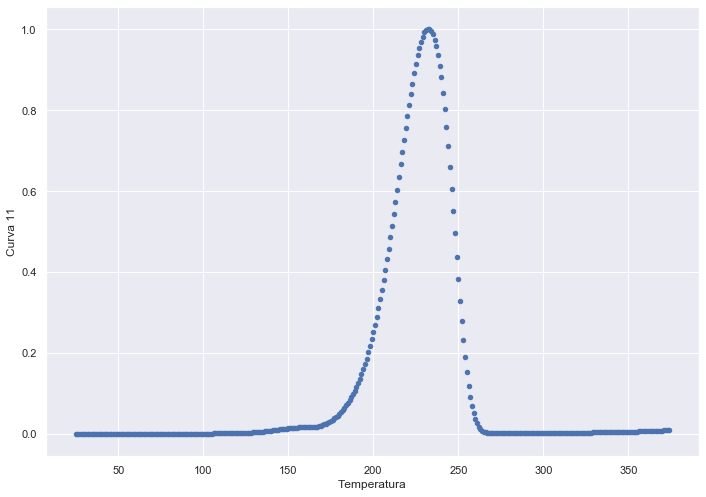

In [288]:
normal.plot(kind='scatter',x='Temperatura',y= 'Curva 11')

,Curva 1,Curva 2,Curva 3,Curva 4,Curva 5,Curva 6,Curva 7,Curva 8,Curva 9
0,1.180324e-06,3.862846e-07,5.139221e-07,2.150899e-07,5.833007e-07,6.039707e-07,5.333755e-07,6.283626e-07,2.193643e-07
1,1.180324e-06,3.565704e-07,3.670872e-07,8.603596e-08,8.749510e-07,5.251919e-07,5.020004e-07,6.283626e-07,3.838875e-07
2,1.180324e-06,4.308559e-07,3.915597e-07,2.581079e-07,1.124937e-06,6.302303e-07,3.137503e-07,6.283626e-07,2.467848e-07
3,8.305983e-07,3.268562e-07,4.405046e-07,3.154652e-07,6.666293e-07,3.676343e-07,4.392504e-07,4.189084e-07,3.016259e-07
4,6.120198e-07,5.497126e-07,4.894496e-07,2.437686e-07,9.999440e-07,4.726727e-07,5.333755e-07,5.236355e-07,2.467848e-07
...,...,...,...,...,...,...,...,...,...
295,9.683028e-05,6.162724e-05,1.304383e-04,1.326388e-05,1.348258e-04,9.290645e-05,8.455570e-05,1.807590e-04,5.204418e-05
296,1.020762e-04,6.332095e-05,1.301202e-04,1.296275e-05,1.382423e-04,9.251256e-05,8.835207e-05,1.894513e-04,5.618468e-05
297,1.037374e-04,6.846151e-05,1.332282e-04,1.327822e-05,1.368673e-04,9.227622e-05,9.271320e-05,1.986150e-04,5.547175e-05
298,1.069286e-04,6.792665e-05,1.305852e-04,1.419593e-05,1.477834e-04,9.568997e-05,9.070520e-05,1.991910e-04,5.955741e-05


## Investigation Plot

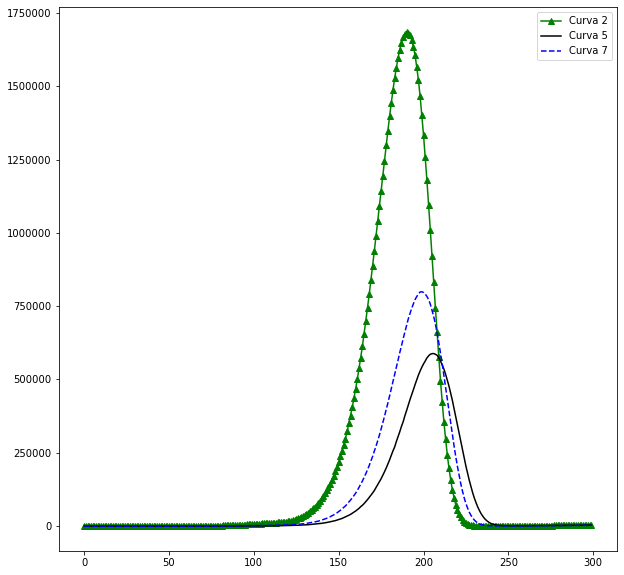

In [334]:
#Not normalized
%matplotlib inline
import matplotlib.pyplot as plt
i = [2,5,7]
cor = ['^g-','k-','b--']
Fig1=plt.Figure(figsize=(10,10)); ax = Fig1.add_subplot(1,1,1)
for isa,color in zip(i,cor):
    ax.plot(data['Temperatura'], data['Curva {0}'.format(isa)], color, label= 'Curva {0}'.format(isa))
ax.legend(loc='best')
Fig1

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


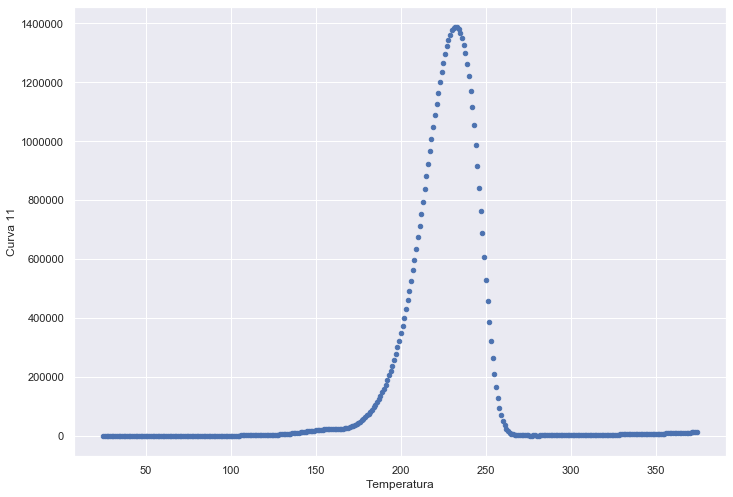

In [80]:
data.plot(kind='scatter',x='Temperatura',y='Curva 11')

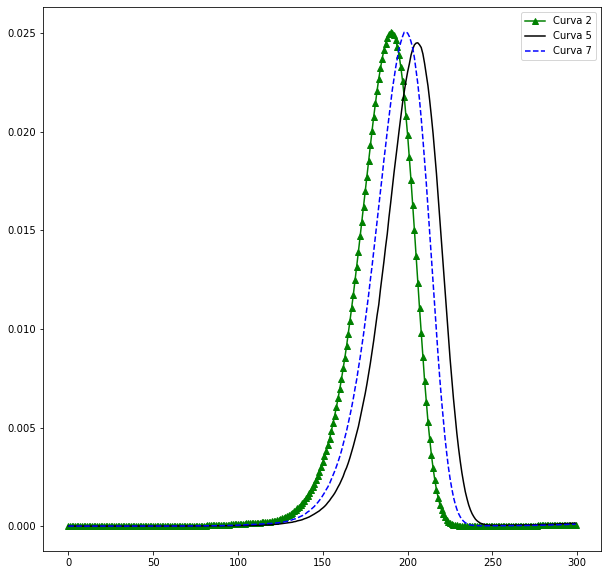

In [333]:
%matplotlib inline
import matplotlib.pyplot as plt
i = [2,5,7]
cor = ['^g-','k-','b--']
Fig1=plt.Figure(figsize=(10,10)); ax = Fig1.add_subplot(1,1,1)
for isa,color in zip(i,cor):
    ax.plot(data['Temperatura'], renewed['Curva {0}'.format(isa)], color, label= 'Curva {0}'.format(isa))
ax.legend(loc='best')
Fig1

Tratar o gráfico como objeto para poder realizar várias plotagens uma em cima da outra

# Banco de Dados

Transpor resultados para subir ao banco de dados

# Lumia Kinetics

In [11]:
#Curva é o argumento de entrada, lims são os limites iniciais e 
#finais de analise int_val é a condição de existencia de valor intermediário

def init_rise_prep(curva,lim_init=80,lim_fin=250,sig=0.07, pre_heat=False, npontos=13, pre_heat_val=25):
    if pre_heat == True:
        int_val+= pre_heat_val
    else:
        pass
#variaveis importantes    
    k=0.00008617333262145                       #constante de bolzmann
                 #Diminuição do dataframe
    curva = curva[lim_init:lim_fin]            #Fatia o dataframe no intervalo de interesse
    limite = curva.cumsum()                        #Determinação dos limites
    tol = limite[max(limite.index)]*sig            #Tolerância para seção do dataset
    atol = []                                     #lista vazia a ser preenchida com valores de intensidade TL
    index = []                                   #índice padrão
    temp = []                                  #temperatura em kelvin
    
    for it,num,cur in zip(limite,limite.index,curva):
        if it < tol:
            atol.append(cur)
            temp.append(num+273)
            index.append(num)
    lim_temp = max(index)
    int_val = lim_temp - npontos #Seleciona 14 pontos
    diff = int_val-lim_init 
    Frame = pd.DataFrame()
    Frame['Temperatura (K)'] = temp
    Frame['TL'] = atol
    Frame['ln(TL)'] = np.log(atol)
    Frame['1/kt'] = 1/(k*Frame['Temperatura (K)'])
    Frame.index=index
    Frame= Frame[:][diff:]
    return Frame

def init_rise_result(prepared_data):
    x = np.array(prepared_data['1/kt'])
    y = np.array(prepared_data['ln(TL)'])
    from scipy.stats import linregress
    lin_reg = linregress(x,y)
    ea = -1*lin_reg.slope
    answer = {'Parametros present':{'Energia de Ativação':'{0}  ± {1} eV'.format(ea, lin_reg.stderr),'r^2':lin_reg.rvalue},
             'Parametros Calc':{'Energia de Ativação':ea,'incerteza':lin_reg.stderr}}
    
    answerdb = {'Energia de Ativação':ea,'incerteza':lin_reg.stderr, 'r^2':lin_reg.rvalue}
    return answerdb

def extract_ir(data):
    resposta = {'EA_IR(eV)':[],'error_ir':[],'r^2_ir':[],'objeto':[]}#conjunto resposta
    colunas = list(data.columns)
    colunas = colunas[1:]
    for coluna in colunas:
        dados = init_rise_prep(data[coluna])                #função de preparação
        answer = init_rise_result(dados)                    #função de regressão
        resposta['EA_IR(eV)'] += [answer['Energia de Ativação']]#adição da resposta
        resposta['error_ir'] += [answer['incerteza']]       #adição da resposta
        resposta['r^2_ir'] += [answer['r^2']]               #adição da resposta
        resposta['objeto'] += [coluna]                      #adição da resposta
    return pd.DataFrame(resposta,index=resposta['objeto'])
        
def area_met_prep(curva,heat_rate, kin_order, lim_init=80,lim_fin=150,deltaT=1, pre_heat=False):

    if heat_rate > 6:
        lim_init=135 
        lim_fin=240 
    elif heat_rate ==6:
        lim_init=120
        lim_fin=220
    elif heat_rate == 5:
        lim_init=120
        lim_fin=220
    elif (heat_rate < 5) & (heat_rate>2):
        lim_init= 130
        lim_fin=  210
    elif heat_rate == 2:
        lim_init= 100
        lim_fin=  200
    elif heat_rate == 1:
        lim_init= 95
        lim_fin=  185
    elif heat_rate == 0.9:
        lim_init=95
        lim_fin= 190
    elif heat_rate == 0.8:
        lim_init=95
        lim_fin= 190
    elif heat_rate == 0.7:
        lim_init=90
        lim_fin=180
    elif (heat_rate < 0.7) & (heat_rate > 0.4):
        lim_init=90
        lim_fin=175
    elif (heat_rate == 0.4):
        lim_init=85
        lim_fin=170
    elif (heat_rate == 0.3):
        lim_init=85
        lim_fin=170
        
    elif (heat_rate == 0.2) | (heat_rate == 0.1):
        lim_init=80
        lim_fin=160
    k=0.00008617333262145
    y = np.array(curva[lim_init:lim_fin])
    x = np.array(curva[lim_init:lim_fin].index)
    temp = x+273     #converte a temperatura para kelvin
    preview = pd.DataFrame()
    preview['Temperatura (K)'] = temp
    preview['TL'] = y
    preview.set_index(x, inplace=True)
    area=[]
    for i in range(len(y)):
        area.append((max(y[i:len(y)].cumsum()))*(deltaT/heat_rate))
    np.array(area)
    preview['area'] = area
    preview['1/kt'] =  1/(k*preview['Temperatura (K)'])
    preview['ln(TL/area)'] = np.log(preview.TL/preview.area)
    for ko in kin_order:
        pr = np.array(np.log(preview.TL/(preview.area)**ko))
        preview = dict(preview)
        preview.setdefault('b= {0}'.format(ko), pr)
        preview = pd.DataFrame(preview)
    return preview

def area_result(prepared_data, heat_rate):
    import math
    from scipy.stats import linregress
    
    x = np.array(prepared_data['1/kt'])
    atr_list = list(prepared_data.columns)
    atr_list = atr_list[4:]
    r_squared = {}
    
    for atributo in atr_list:
        y=np.array(prepared_data[atributo])
        lin_reg = linregress(x,y)
        r_squared.setdefault(atributo,-1*lin_reg.rvalue)
    best = max(r_squared)
    y=np.array(prepared_data[best])
    lin_reg = linregress(x,y)
    ea = -1*lin_reg.slope
    escape_factor = heat_rate*math.exp(-lin_reg.intercept)
    escape_error = lin_reg.intercept_stderr * escape_factor
    percentual_error = escape_error/escape_factor
    if best == 'ln(TL/area)':
        best = 'b = 1'
    answer_present = {'Energia de Ativação':'{0}  ± {1} eV'.format(ea, lin_reg.stderr),
                      'r^2':lin_reg.rvalue,
                      'Fator de Escape':'{0} ± {1} eV'.format(escape_factor,escape_error),
                      'Erro percentual':'{0} %'.format(percentual_error*100)}
    answer_db = {'Energia de Ativação':ea,
                 'Incerteza EA':lin_reg.stderr,
                 'r^2':lin_reg.rvalue,
                 'Fator de Escape':escape_factor, 
                 'Incerteza Escape_factor':escape_error,
                 'Percentual Error':percentual_error,
                 'Best_kin_order':best}                       
    return answer_present, answer_db

def extract_area(data,heat_rate,test_kin_order):#informar uma lista com todas as taxas de aquecimento do DB
    resposta = {'EA_AREA(eV)':[],'error_AREA':[],'r^2_AREA':[],'freq_factor_AREA':[],
                'ff_err_AREA':[],'ff_percerr_AREA':[],'AREA_kin_order':[],'objeto':[], 
                'Taxa de aquecimento':[]} #conjunto resposta
    colunas = list(data.columns)
    colunas = colunas[1:]
    for coluna, hr in zip(colunas, heat_rate):
        dados = area_met_prep(data[coluna],hr, test_kin_order)                #função de preparação
        answer_pres, answer = area_result(dados,hr)                    #função de regressão
        resposta['EA_AREA(eV)'] += [answer['Energia de Ativação']]#adição da resposta
        resposta['error_AREA'] += [answer['Incerteza EA']]       #adição da resposta
        resposta['r^2_AREA'] += [answer['r^2']]               #adição da resposta
        resposta['freq_factor_AREA'] += [answer['Fator de Escape']]
        resposta['ff_err_AREA'] += [answer['Incerteza Escape_factor']]
        resposta['ff_percerr_AREA'] += [answer['Percentual Error']]
        resposta['AREA_kin_order'] += [answer['Best_kin_order']]
        resposta['Taxa de aquecimento'] += [hr]
        resposta['objeto'] += [coluna]                      #adição da resposta
    return pd.DataFrame(resposta,index=resposta['objeto'])

def peak_shape_met(curva,DeltaT=1,error=0.5):

#Encontrar a posição do pico
    peak = curva.max()

#Encontrar o índice (Temperatura) do pico:

    j=0
    for i in curva:
        if i == peak:
            tmax = j*DeltaT
            break
        else:
            j+=1
#################################################################################################################

#Meia Altura
    half_peak = peak/2
#Divisão do Dataset em dois
    t1_cand = np.array(curva[:tmax]) #Para T1
    t2_cand = np.array(curva[tmax:]) #Para T2

#################################################################################################################

#Testes lógicos para encontrar os índex respectivos
# Fração inferior ao pico
    j=0
    for cand1 in t1_cand:
        if cand1 < half_peak:
            j0=j
            j+=1
        else:
            j2 = j0+1
            j+= 1
            continue
# O j não reseta entre as iterações de t1_cand para t2_cand

# Fração superior ao pico
    for cand2 in t2_cand:
        if cand2 > half_peak:
            j1=j
            j+=1
        else:
            j3 = j1+1
            break

#Obtenção de T1 e transformação de ponto para temperatura
    if (half_peak - curva[j0]) < (curva[j2] - half_peak):
        t1 = j0 * DeltaT
    else:
        t1 = j2 * DeltaT
#Obtenção de T2  
    if (curva[j1] - half_peak) < (half_peak - curva[j3]):
        t2 = j1 * DeltaT
    else:
        t2 = j3 * DeltaT
########################################################################################################################    

# para kelvin
    t1 += 273
    t2 += 273
    tmax += 273
    k=0.00008617333262145
# Calculo dos parâmetros de forma
    delta = t2 - tmax
    omega = t2 - t1
    tau = tmax - t1
    shape_factor_mi = delta/omega
    shape_factor_gama = delta/tau

#Energia de ativação

#Omega de Chen
    omega_chen = (2.25+10.2*(shape_factor_mi - 0.42))*((k*tmax**2)/omega) - 1*(2*k*tmax)
#Tau de Chen
    tau_chen = (1.510+3.0*(shape_factor_mi - 0.42))*((k*tmax**2)/tau) - (1.58+4.2*(shape_factor_mi - 0.42))*(2*k*tmax)
#delta de Chen
    delta_chen = (0.976+7.3*(shape_factor_mi - 0.42))*((k*tmax**2)/delta)
#kinetic order
    if shape_factor_mi < 0.44:
        kin_order = 'Primeira Ordem'
    elif shape_factor_mi < 0.50:
        kin_order = 'Ordem Geral'
    else:
        kin_order = 'Segunda Ordem'
#Incertezas
#delta
    delta_error = (2*(error/tmax) + (error/delta))*delta_chen
    mi_error = ((error/delta) + (error/omega))*shape_factor_mi
#resposta
    answer = {'Parâmetros de forma':{'delta':'{0} K'.format(delta),'omega':'{0} K'.format(omega),'tau':'{0} K'.format(tau),
                                     'mi':'{0} ± {1}'.format(shape_factor_mi, mi_error)},
              'Energia de Ativação':{'Delta de Chen':'{0} ± {1} eV'.format(delta_chen,delta_error),
                                     'Tau de Chen':'{0} eV'.format(tau_chen),
                                     'Omega de Chen':'{0} eV'.format(omega_chen)},
              'Ordem Cinética':kin_order, 'Outras informações':{'TMax':'{0} K'.format(tmax),'T1':'{0} K'.format(t1),
                                                                'T2':'{0} K'.format(t2), 'IM':peak}}
    answerdb = {'Delta de Chen':delta_chen,
                'deta_error':delta_error,
                'Tau de Chen':tau_chen,
                'Omega de Chen':omega_chen,
                'Ordem Cinética':kin_order,
                'Tmax':tmax,
                'T1':t1,
                'T2':t2,
                'IM':peak,
                'Mi':shape_factor_mi,
                'mi_error':mi_error,
                'delta':delta,
                'Tau':tau,
                'Omega':omega}
    return answer, answerdb

def extract_pshape(data):
    resposta = {'tau_chen(eV)':[],'omega_chen(eV)':[],'delta_chen(eV)':[],'delta_error':[],
                'ordem_cinetica':[],'tmax':[],'t1':[],'t2':[],'IM':[],'Shape_factor':[],
                'Sf_error':[],'objeto':[]} #conjunto resposta
    colunas = list(data.columns)
    colunas = colunas[1:]
    for coluna in colunas:              
        answer_pres, answer = peak_shape_met(data[coluna])                    #função de regressão
        resposta['tau_chen(eV)'] += [answer['Tau de Chen']]#adição da resposta
        resposta['omega_chen(eV)'] += [answer['Omega de Chen']]       #adição da resposta
        resposta['delta_chen(eV)'] += [answer['Delta de Chen']]               #adição da resposta
        resposta['delta_error'] += [answer['deta_error']]       
        resposta['ordem_cinetica'] += [answer['Ordem Cinética']]          
        resposta['tmax'] += [answer['Tmax']]          
        resposta['t1'] += [answer['T1']]          
        resposta['t2'] += [answer['T2']]
        resposta['IM'] += [answer['IM']]
        resposta['Shape_factor'] += [answer['Mi']]
        resposta['Sf_error'] += [answer['mi_error']]
        resposta['objeto'] += [coluna]                      #adição da resposta
    return pd.DataFrame(resposta,index=resposta['objeto'])
        
def multi_heating_rate_ti(curva1,curva2,heating_rate, DeltaT=1, pre_heat_temp=25):
    
#Encontrar a posição do pico

    k=0.00008617333262145
    curvas = [curva1,curva2] #transforma em um objeto tipo lista iteravel
    ind=0 # quando ind=0, sub index 1, quando ind=1 sub index 2
#Encontrar IM & TM de cada uma das curvas:
    for curva, hr in zip(curvas, heating_rate):
        peak = curva.max()
        j=0
        for i in curva:
            if i == peak:
                tmax = j*DeltaT + pre_heat_temp
                break
            else:
                j+=1
        if ind == 0:
            tm1c = tmax
            Im1s = peak
            hr_1 = hr
            Im1 = peak/hr_1
            Tm1 = tm1c+ 273
             
        else:
            tm2c = tmax
            hr_2= hr
            Im2 = peak/hr_2
            Tm2 = tm2c + 273
        ind+=1
#Calculo da Energia de ativação
    EA_beta = k * ((Tm1*Tm2)/(Tm1-Tm2))*np.log((hr_1/hr_2)*(Tm1/Tm2)**2)
    EA_Im = ((k*Tm1*Tm2)/(Tm1-Tm2))*np.log((Im1/Im2))
    return(EA_beta,EA_Im,Tm1,Tm2)

def multi_heating_rate_prep(dataset,curvas,heating_rate, DeltaT=1): 
    Df_new = {'Temperatura (C)':[], 'Temperatura (K)':[],'y':[],'x':[],'Heat_rate':[]}
    k=0.00008617333262145

    for curv, hr in zip(curvas, heating_rate):
        curva = dataset[curv]
        peak = curva.max()
        j=0
        for i in curva:
            if i == peak:
                tmax = j*DeltaT +25
                break
            else:
                j+=1
        tm1c = tmax
        Tm = tm1c+ 273
        Df_new['Temperatura (C)'] += [tm1c]
        Df_new['Temperatura (K)'] += [Tm]
        Df_new['y'] += [np.log((Tm**2)/hr)]
        Df_new['x'] += [1/(k*Tm)]
        Df_new['Heat_rate'] += [hr]
    return pd.DataFrame(Df_new)

def multi_heating_rate_reg(dados_preparados):#recebe a saída de multi_heating_rate_prep()
    from scipy.stats import linregress
    import math
    k=0.00008617333262145
    x = dados_preparados['x']
    y = dados_preparados['y']
#Regressão Linear

    lin_reg = linregress(x,y) #Regressão
    
#Calculo de parâmetros cinéticos

    ea = lin_reg.slope
    intercept = lin_reg.intercept
    escape_factor = ea*math.exp(intercept/k)
    escape_per_error = (lin_reg.stderr/ea) + lin_reg.intercept_stderr
    escape_error = escape_per_error * escape_factor
    
#Resposta   
    answer_present = {'Energia de Ativação':'{0}  ± {1} eV'.format(ea, lin_reg.stderr),
                      'r^2':lin_reg.rvalue,
                      'Fator de Escape':'{0} ± {1} eV'.format(escape_factor,escape_error),
                      'Erro percentual':'{0} %'.format(escape_per_error*100)}
    answer_db = {'Energia de Ativação':ea,
                 'Incerteza EA':lin_reg.stderr,
                 'r^2':lin_reg.rvalue,
                 'Fator de Escape':escape_factor, 
                 'Incerteza Escape_factor':escape_error,
                 'Percentual Error':escape_per_error} 
    return answer_present, answer_db

#Entra com o conjunto de dados e uma lista com a lista de nomes das curvas de cada amostra
def extract_mhr(data,samples,heat_rate):#informar uma lista com todas as taxas de aquecimento do DB
    resposta = {'EA_mhr(eV)':[],'error_AREA':[],'r^2_mp':[],'freq_factor_mp':[],
                'ff_percerr_mp':[],'Amostra':[] 
                } #conjunto resposta
    amostra = 1
    for sample in samples:
        
        dados = multi_heating_rate_prep(data,sample,heat_rate)               #função de preparação
        answer_pres, answer = multi_heating_rate_reg(dados)                    #função de regressão
        resposta['EA_mhr(eV)'] += [answer['Energia de Ativação']]#adição da resposta
        resposta['error_AREA'] += [answer['Incerteza EA']]       #adição da resposta
        resposta['r^2_mp'] += [answer['r^2']]               #adição da resposta
        resposta['freq_factor_mp'] += [answer['Fator de Escape']]
        resposta['ff_percerr_mp'] += [answer['Percentual Error']]
        resposta['Amostra'] += ['Amosta {0}'.format(amostra)]                      #adição da resposta
        amostra+=1
    return pd.DataFrame(resposta, index=resposta['Amostra'])
    

# Implementação dos métodos Cinéticos

Aqui estão implementados os métodos de ascenção inicial, método que leva área em consideração, metodo do formato da curva [tau, omega e delta de chen] e métodos que levam em consideração diferentes taxas de aquecimento, fora criadas funções de preparação, regressão e extração de informação.

## Initial Rise method

Este método leva em consideração apenas 7% da cruva de de brilho. 

### Função de preparação 

In [ ]:
def init_rise_prep(curva,lim_init=80,lim_fin=250,sig=0.07, pre_heat=False, npontos=13, pre_heat_val=25):
    if pre_heat == True:
        int_val+= pre_heat_val
    else:
        pass
#variaveis importantes    
    k=0.00008617333262145                       #constante de bolzmann
                 #Diminuição do dataframe
    curva = curva[lim_init:lim_fin]            #Fatia o dataframe no intervalo de interesse
    limite = curva.cumsum()                        #Determinação dos limites
    tol = limite[max(limite.index)]*sig            #Tolerância para seção do dataset
    atol = []                                     #lista vazia a ser preenchida com valores de intensidade TL
    index = []                                   #índice padrão
    temp = []                                  #temperatura em kelvin
    
    for it,num,cur in zip(limite,limite.index,curva):
        if it < tol:
            atol.append(cur)
            temp.append(num+273)
            index.append(num)
    lim_temp = max(index)
    int_val = lim_temp - npontos #Seleciona 14 pontos
    diff = int_val-lim_init 
    Frame = pd.DataFrame()
    Frame['Temperatura (K)'] = temp
    Frame['TL'] = atol
    Frame['ln(TL)'] = np.log(atol)
    Frame['1/kt'] = 1/(k*Frame['Temperatura (K)'])
    Frame.index=index
    Frame= Frame[:][diff:]
    return Frame



In [138]:
fi = init_rise_prep(data['Curva 11'])

In [139]:
fi

,Temperatura (K),TL,ln(TL),1/kt
88,361,95392.0,11.465750,32.145480
89,362,105648.0,11.567868,32.056680
90,363,116995.0,11.669886,31.968369
91,364,128994.0,11.767521,31.880544
92,365,143459.0,11.873805,31.793200
93,366,159481.0,11.979680,31.706334
94,367,175817.0,12.077199,31.619940
95,368,194131.0,12.176288,31.534017
96,369,213946.0,12.273479,31.448559
97,370,234983.0,12.367268,31.363562


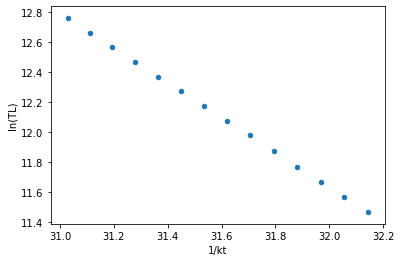

In [140]:
fi.plot(kind='scatter', x='1/kt',y='ln(TL)')

### Função de Regressão

In [3]:
def init_rise_result(prepared_data):
    x = np.array(prepared_data['1/kt'])
    y = np.array(prepared_data['ln(TL)'])
    from scipy.stats import linregress
    lin_reg = linregress(x,y)
    ea = -1*lin_reg.slope
    answer = {'Parametros present':{'Energia de Ativação':'{0}  ± {1} eV'.format(ea, lin_reg.stderr),'r^2':lin_reg.rvalue},
             'Parametros Calc':{'Energia de Ativação':ea,'incerteza':lin_reg.stderr}}
    
    answerdb = {'Energia de Ativação':ea,'incerteza':lin_reg.stderr, 'r^2':lin_reg.rvalue}
    return answerdb

## Extract function IR

In [4]:
def extract_ir(data):
    resposta = {'EA_IR(eV)':[],'error_ir':[],'r^2_ir':[],'objeto':[]}#conjunto resposta
    colunas = list(data.columns)
    colunas = colunas[1:]
    for coluna in colunas:
        dados = init_rise_prep(data[coluna])                #função de preparação
        answer = init_rise_result(dados)                    #função de regressão
        resposta['EA_IR(eV)'] += [answer['Energia de Ativação']]#adição da resposta
        resposta['error_ir'] += [answer['incerteza']]       #adição da resposta
        resposta['r^2_ir'] += [answer['r^2']]               #adição da resposta
        resposta['objeto'] += [coluna]                      #adição da resposta
    return pd.DataFrame(resposta,index=resposta['objeto'])
        
        

In [234]:
extract_ir(data)

,EA_IR(eV),error_ir,r^2_ir,objeto
Curva 11,1.354316,0.004597,-0.999931,Curva 11
Curva 12,1.381203,0.005695,-0.999898,Curva 12
Curva 13,1.325906,0.002665,-0.999976,Curva 13
Curva 14,1.377879,0.003187,-0.999968,Curva 14
Curva 15,1.385198,0.004730,-0.999930,Curva 15
...,...,...,...,...
Curva 191,1.160031,0.002200,-0.999978,Curva 191
Curva 192,1.152998,0.002400,-0.999974,Curva 192
Curva 193,1.166565,0.003286,-0.999952,Curva 193
Curva 194,1.154678,0.001905,-0.999984,Curva 194


In [47]:
init_rise_result(fi)

{'Parametros present': {'Energia de Ativação': '1.2599699377986147  ± 0.006283180193929733 eV',
  'r^2': -0.9998508261401104},
 'Parametros Calc': {'Energia de Ativação': 1.2599699377986147,
  'incerteza': 0.006283180193929733}}

# Area Method

Devido ao deslocamento da curva em diferentes taxas de aquecimento, várias condicionais foram adicionadas para adequar os intervalos à curvas. Todos os intervalos foram obtidos empiricamente.

### Função de preparação 

In [5]:
def area_met_prep(curva,heat_rate, kin_order, lim_init=80,lim_fin=150,deltaT=1, pre_heat=False):

    if heat_rate > 6:
        lim_init=135 
        lim_fin=240 
    elif heat_rate ==6:
        lim_init=120
        lim_fin=220
    elif heat_rate == 5:
        lim_init=120
        lim_fin=220
    elif (heat_rate < 5) & (heat_rate>2):
        lim_init= 130
        lim_fin=  210
    elif heat_rate == 2:
        lim_init= 100
        lim_fin=  200
    elif heat_rate == 1:
        lim_init= 95
        lim_fin=  185
    elif heat_rate == 0.9:
        lim_init=95
        lim_fin= 190
    elif heat_rate == 0.8:
        lim_init=95
        lim_fin= 190
    elif heat_rate == 0.7:
        lim_init=90
        lim_fin=180
    elif (heat_rate < 0.7) & (heat_rate > 0.4):
        lim_init=90
        lim_fin=175
    elif (heat_rate == 0.4):
        lim_init=85
        lim_fin=170
    elif (heat_rate == 0.3):
        lim_init=85
        lim_fin=170
        
    elif (heat_rate == 0.2) | (heat_rate == 0.1):
        lim_init=80
        lim_fin=160
    k=0.00008617333262145
    y = np.array(curva[lim_init:lim_fin])
    x = np.array(curva[lim_init:lim_fin].index)
    temp = x+273     #converte a temperatura para kelvin
    preview = pd.DataFrame()
    preview['Temperatura (K)'] = temp
    preview['TL'] = y
    preview.set_index(x, inplace=True)
    area=[]
    for i in range(len(y)):
        area.append((max(y[i:len(y)].cumsum()))*(deltaT/heat_rate))
    np.array(area)
    preview['area'] = area
    preview['1/kt'] =  1/(k*preview['Temperatura (K)'])
    preview['ln(TL/area)'] = np.log(preview.TL/preview.area)
    for ko in kin_order:
        pr = np.array(np.log(preview.TL/(preview.area)**ko))
        preview = dict(preview)
        preview.setdefault('b= {0}'.format(ko), pr)
        preview = pd.DataFrame(preview)
    return preview

In [50]:
dados

,Temperatura (K),TL,area,1/kt,ln(TL/area),b= 1.1,b= 1.2,b= 1.3,b= 1.4
130,403,7644,4536804.8,28.795330,-6.386057,-7.918831,-9.451604,-10.984377,-12.517151
131,404,8384,4535276.0,28.724055,-6.293316,-7.826056,-9.358795,-10.891535,-12.424275
132,405,9055,4533599.2,28.653131,-6.215954,-7.748657,-9.281360,-10.814062,-12.346765
133,406,9950,4531788.2,28.582557,-6.121299,-7.653962,-9.186625,-10.719287,-12.251950
134,407,10992,4529798.2,28.512330,-6.021265,-7.553884,-9.086503,-10.619121,-12.151740
...,...,...,...,...,...,...,...,...,...
225,498,31485,19912.4,23.302245,0.458169,-0.531741,-1.521651,-2.511561,-3.501471
226,499,24407,13615.4,23.255547,0.583668,-0.368227,-1.320123,-2.272019,-3.223914
227,500,18801,8734.0,23.209036,0.766687,-0.140811,-1.048309,-1.955807,-2.863305
228,501,14116,4973.8,23.162711,1.043125,0.191931,-0.659263,-1.510457,-2.361651


In [7]:
dados.columns

Index(['Temperatura (K)', 'TL', 'area', '1/kt', 'ln(TL/area)', 'b= 1.1',
       'b= 1.2', 'b= 1.3', 'b= 1.4'],
      dtype='object')

### Função de regressão

In [6]:
def area_result(prepared_data, heat_rate):
    import math
    from scipy.stats import linregress
    
    x = np.array(prepared_data['1/kt'])
    atr_list = list(prepared_data.columns)
    atr_list = atr_list[4:]
    r_squared = {}
    
    for atributo in atr_list:
        y=np.array(prepared_data[atributo])
        lin_reg = linregress(x,y)
        r_squared.setdefault(atributo,-1*lin_reg.rvalue)
    best = max(r_squared)
    y=np.array(prepared_data[best])
    lin_reg = linregress(x,y)
    ea = -1*lin_reg.slope
    escape_factor = heat_rate*math.exp(-lin_reg.intercept)
    escape_error = lin_reg.intercept_stderr * escape_factor
    percentual_error = escape_error/escape_factor
    if best == 'ln(TL/area)':
        best = 'b = 1'
    answer_present = {'Energia de Ativação':'{0}  ± {1} eV'.format(ea, lin_reg.stderr),
                      'r^2':lin_reg.rvalue,
                      'Fator de Escape':'{0} ± {1} eV'.format(escape_factor,escape_error),
                      'Erro percentual':'{0} %'.format(percentual_error*100)}
    answer_db = {'Energia de Ativação':ea,
                 'Incerteza EA':lin_reg.stderr,
                 'r^2':lin_reg.rvalue,
                 'Fator de Escape':escape_factor, 
                 'Incerteza Escape_factor':escape_error,
                 'Percentual Error':percentual_error,
                 'Best_kin_order':best}                       
    return answer_present, answer_db

In [28]:
area_result(dados,heat_rate=1)

NameError: name 'dados' is not defined

## Extract function AREA

In [83]:
def extract_area(data,heat_rate,test_kin_order):#informar uma lista com todas as taxas de aquecimento do DB
    resposta = {'EA_AREA(eV)':[],'error_AREA':[],'r^2_AREA':[],'freq_factor_AREA':[],
                'ff_err_AREA':[],'ff_percerr_AREA':[],'AREA_kin_order':[],'objeto':[], 
                'Taxa de aquecimento':[]} #conjunto resposta
    colunas = list(data.columns)
    colunas = colunas[1:]
    for coluna, hr in zip(colunas, heat_rate):
        dados = area_met_prep(data[coluna],hr, test_kin_order)                #função de preparação
        answer_pres, answer = area_result(dados,hr)                    #função de regressão
        resposta['EA_AREA(eV)'] += [answer['Energia de Ativação']]#adição da resposta
        resposta['error_AREA'] += [answer['Incerteza EA']]       #adição da resposta
        resposta['r^2_AREA'] += [answer['r^2']]               #adição da resposta
        resposta['freq_factor_AREA'] += [answer['Fator de Escape']]
        resposta['ff_err_AREA'] += [answer['Incerteza Escape_factor']]
        resposta['ff_percerr_AREA'] += [answer['Percentual Error']]
        resposta['AREA_kin_order'] += [answer['Best_kin_order']]
        resposta['Taxa de aquecimento'] += [hr]
        resposta['objeto'] += [coluna]                      #adição da resposta
    return pd.DataFrame(resposta,index=resposta['objeto'])

In [233]:
area_data = extract_area(data,heat_rate,test_kin_order=[1.1,1.2,1.3,1.4])
area_data.head(50)

,EA_AREA(eV),error_AREA,r^2_AREA,freq_factor_AREA,ff_err_AREA,ff_percerr_AREA,AREA_kin_order,objeto,Taxa de aquecimento
Curva 11,1.304175,0.007346,-0.998370,3.186337e-13,5.943526e-14,0.186532,b = 1,Curva 11,10.0
Curva 12,1.299657,0.017293,-0.991005,6.619226e-13,2.906650e-13,0.439122,b = 1,Curva 12,10.0
Curva 13,1.279431,0.004801,-0.999276,4.521669e-13,5.512871e-14,0.121921,b = 1,Curva 13,10.0
Curva 14,1.324304,0.016720,-0.991890,4.024433e-13,1.708703e-13,0.424582,b = 1,Curva 14,10.0
Curva 15,1.328949,0.015447,-0.993114,3.151606e-13,1.236216e-13,0.392250,b = 1,Curva 15,10.0
Curva 21,1.296746,0.004939,-0.999254,3.043758e-13,3.817242e-14,0.125412,b = 1,Curva 21,9.0
Curva 22,1.311830,0.012005,-0.995715,3.678823e-13,1.121468e-13,0.304844,b = 1,Curva 22,9.0
Curva 23,1.256005,0.007410,-0.998213,6.948965e-13,1.307451e-13,0.188151,b = 1,Curva 23,9.0
Curva 24,1.330767,0.013493,-0.994747,2.883606e-13,9.879982e-14,0.342626,b = 1,Curva 24,9.0
Curva 25,1.335118,0.011261,-0.996357,2.134001e-13,6.101992e-14,0.285941,b = 1,Curva 25,9.0


In [21]:
heat_r = [4]*3+[5]*3+[6]*3
heat_r

[4, 4, 4, 5, 5, 5, 6, 6, 6]

In [35]:
extract_area(data,heat_r,test_kin_order=[1.1,1.2,1.3,1.4])

,EA_AREA(eV),error_AREA,r^2_AREA,freq_factor_AREA,ff_err_AREA,ff_percerr_AREA,AREA_kin_order,objeto,Taxa de aquecimento
Curva 1,1.253285,0.006816,-0.998554,5.902740e-13,1.038124e-13,0.175871,b = 1,Curva 1,4
Curva 2,1.186899,0.006635,-0.998472,2.140011e-12,3.663618e-13,0.171196,b = 1,Curva 2,4
Curva 3,1.268327,0.007545,-0.998271,4.759065e-13,9.264806e-14,0.194677,b = 1,Curva 3,4
Curva 4,1.427641,0.020693,-0.989862,3.081065e-14,1.645092e-14,0.533936,b = 1,Curva 4,5
Curva 5,1.331701,0.009368,-0.997584,1.398650e-13,3.381014e-14,0.241734,b = 1,Curva 5,5
Curva 6,1.175775,0.009768,-0.996635,2.552704e-12,6.434294e-13,0.252058,b = 1,Curva 6,5
Curva 7,1.286141,0.007090,-0.998514,2.988595e-13,5.467193e-14,0.182935,b = 1,Curva 7,6
Curva 8,1.290291,0.007594,-0.998307,2.817573e-13,5.521137e-14,0.195954,b = 1,Curva 8,6
Curva 9,1.285050,0.007493,-0.998338,3.188590e-13,6.165212e-14,0.193352,b = 1,Curva 9,6


# Peak Shape Method

Este método faz uma iteração de ponto a ponto a fim de encontrar o valor de pico e encontrar o equivalente em temperatura a Intensidade máxima.

In [7]:
def peak_shape_met(curva,DeltaT=1,error=0.5):

#Encontrar a posição do pico
    peak = curva.max()

#Encontrar o índice (Temperatura) do pico:

    j=0
    for i in curva:
        if i == peak:
            tmax = j*DeltaT
            break
        else:
            j+=1
#################################################################################################################

#Meia Altura
    half_peak = peak/2
#Divisão do Dataset em dois
    t1_cand = np.array(curva[:tmax]) #Para T1
    t2_cand = np.array(curva[tmax:]) #Para T2

#################################################################################################################

#Testes lógicos para encontrar os índex respectivos
# Fração inferior ao pico
    j=0
    for cand1 in t1_cand:
        if cand1 < half_peak:
            j0=j
            j+=1
        else:
            j2 = j0+1
            j+= 1
            continue
# O j não reseta entre as iterações de t1_cand para t2_cand

# Fração superior ao pico
    for cand2 in t2_cand:
        if cand2 > half_peak:
            j1=j
            j+=1
        else:
            j3 = j1+1
            break

#Obtenção de T1 e transformação de ponto para temperatura
    if (half_peak - curva[j0]) < (curva[j2] - half_peak):
        t1 = j0 * DeltaT
    else:
        t1 = j2 * DeltaT
#Obtenção de T2  
    if (curva[j1] - half_peak) < (half_peak - curva[j3]):
        t2 = j1 * DeltaT
    else:
        t2 = j3 * DeltaT
########################################################################################################################    

# para kelvin
    t1 += 273
    t2 += 273
    tmax += 273
    k=0.00008617333262145
# Calculo dos parâmetros de forma
    delta = t2 - tmax
    omega = t2 - t1
    tau = tmax - t1
    shape_factor_mi = delta/omega
    shape_factor_gama = delta/tau

#Energia de ativação

#Omega de Chen
    omega_chen = (2.25+10.2*(shape_factor_mi - 0.42))*((k*tmax**2)/omega) - 1*(2*k*tmax)
#Tau de Chen
    tau_chen = (1.510+3.0*(shape_factor_mi - 0.42))*((k*tmax**2)/tau) - (1.58+4.2*(shape_factor_mi - 0.42))*(2*k*tmax)
#delta de Chen
    delta_chen = (0.976+7.3*(shape_factor_mi - 0.42))*((k*tmax**2)/delta)
#kinetic order
    if shape_factor_mi < 0.44:
        kin_order = 'Primeira Ordem'
    elif shape_factor_mi < 0.50:
        kin_order = 'Ordem Geral'
    else:
        kin_order = 'Segunda Ordem'
#Incertezas
#delta
    delta_error = (2*(error/tmax) + (error/delta))*delta_chen
    mi_error = ((error/delta) + (error/omega))*shape_factor_mi
#resposta
    answer = {'Parâmetros de forma':{'delta':'{0} K'.format(delta),'omega':'{0} K'.format(omega),'tau':'{0} K'.format(tau),
                                     'mi':'{0} ± {1}'.format(shape_factor_mi, mi_error)},
              'Energia de Ativação':{'Delta de Chen':'{0} ± {1} eV'.format(delta_chen,delta_error),
                                     'Tau de Chen':'{0} eV'.format(tau_chen),
                                     'Omega de Chen':'{0} eV'.format(omega_chen)},
              'Ordem Cinética':kin_order, 'Outras informações':{'TMax':'{0} K'.format(tmax),'T1':'{0} K'.format(t1),
                                                                'T2':'{0} K'.format(t2), 'IM':peak}}
    answerdb = {'Delta de Chen':delta_chen,
                'deta_error':delta_error,
                'Tau de Chen':tau_chen,
                'Omega de Chen':omega_chen,
                'Ordem Cinética':kin_order,
                'Tmax':tmax,
                'T1':t1,
                'T2':t2,
                'IM':peak,
                'Mi':shape_factor_mi,
                'mi_error':mi_error,
                'delta':delta,
                'Tau':tau,
                'Omega':omega}
    return answer, answerdb

In [41]:
resposta = peak_shape_met(data['Curva 2'])
resposta

({'Parâmetros de forma': {'delta': '16 K',
   'omega': '37 K',
   'tau': '21 K',
   'mi': '0.43243243243243246 ± 0.01935719503287071'},
  'Energia de Ativação': {'Delta de Chen': '1.2316300900752013 ± 0.0411485485007576 eV',
   'Tau de Chen': '1.230852683912226 eV',
   'Omega de Chen': '1.1068674769712576 eV'},
  'Ordem Cinética': 'Primeira Ordem',
  'Outras informações': {'TMax': '463 K',
   'T1': '442 K',
   'T2': '479 K',
   'IM': 1685212}},
 {'Delta de Chen': 1.2316300900752013,
  'deta_error': 0.0411485485007576,
  'Tau de Chen': 1.230852683912226,
  'Omega de Chen': 1.1068674769712576,
  'Ordem Cinética': 'Primeira Ordem',
  'Tmax': 463,
  'T1': 442,
  'T2': 479,
  'IM': 1685212,
  'Mi': 0.43243243243243246,
  'mi_error': 0.01935719503287071,
  'delta': 16,
  'Tau': 21,
  'Omega': 37})

## Extract Function PeakShape

In [8]:
def extract_pshape(data):
    resposta = {'tau_chen(eV)':[],'omega_chen(eV)':[],'delta_chen(eV)':[],'delta_error':[],
                'ordem_cinetica':[],'tmax':[],'t1':[],'t2':[],'IM':[],'Shape_factor':[],
                'Sf_error':[],'objeto':[]} #conjunto resposta
    colunas = list(data.columns)
    colunas = colunas[1:]
    for coluna in colunas:              
        answer_pres, answer = peak_shape_met(data[coluna])                    #função de regressão
        resposta['tau_chen(eV)'] += [answer['Tau de Chen']]#adição da resposta
        resposta['omega_chen(eV)'] += [answer['Omega de Chen']]       #adição da resposta
        resposta['delta_chen(eV)'] += [answer['Delta de Chen']]               #adição da resposta
        resposta['delta_error'] += [answer['deta_error']]       
        resposta['ordem_cinetica'] += [answer['Ordem Cinética']]          
        resposta['tmax'] += [answer['Tmax']]          
        resposta['t1'] += [answer['T1']]          
        resposta['t2'] += [answer['T2']]
        resposta['IM'] += [answer['IM']]
        resposta['Shape_factor'] += [answer['Mi']]
        resposta['Sf_error'] += [answer['mi_error']]
        resposta['objeto'] += [coluna]                      #adição da resposta
    return pd.DataFrame(resposta,index=resposta['objeto'])
        

In [36]:
shape_data = extract_pshape(data)

# Mutiple Heating Rate

### Método baseado em Tmax e Imax

In [9]:
def multi_heating_rate_ti(curva1,curva2,heating_rate, DeltaT=1, pre_heat_temp=25):
    
#Encontrar a posição do pico

    k=0.00008617333262145
    curvas = [curva1,curva2] #transforma em um objeto tipo lista iteravel
    ind=0 # quando ind=0, sub index 1, quando ind=1 sub index 2
#Encontrar IM & TM de cada uma das curvas:
    for curva, hr in zip(curvas, heating_rate):
        peak = curva.max()
        j=0
        for i in curva:
            if i == peak:
                tmax = j*DeltaT + pre_heat_temp
                break
            else:
                j+=1
        if ind == 0:
            tm1c = tmax
            Im1s = peak
            hr_1 = hr
            Im1 = peak/hr_1
            Tm1 = tm1c+ 273
             
        else:
            tm2c = tmax
            hr_2= hr
            Im2 = peak/hr_2
            Tm2 = tm2c + 273
        ind+=1
#Calculo da Energia de ativação
    EA_beta = k * ((Tm1*Tm2)/(Tm1-Tm2))*np.log((hr_1/hr_2)*(Tm1/Tm2)**2)
    EA_Im = ((k*Tm1*Tm2)/(Tm1-Tm2))*np.log((Im1/Im2))
    return(EA_beta,EA_Im,Tm1,Tm2)

In [83]:
multi_heating_rate_ti(data['Curva 13'],data['Curva 193'], heating_rate=[10,0.1])

(1.191250396031641, -1.192895020892553, 501, 425)

### Método de Regressão

#### Função de Preparação 

In [223]:
def multi_heating_rate_prep(dataset,curvas,heating_rate, DeltaT=1): 
    Df_new = {'Temperatura (C)':[], 'Temperatura (K)':[],'y':[],'x':[],'Heat_rate':[]}
    k=0.00008617333262145

    for curv, hr in zip(curvas, heating_rate):
        curva = dataset[curv]
        peak = curva.max()
        j=0
        for i in curva:
            if i == peak:
                tmax = j*DeltaT +25
                break
            else:
                j+=1
        tm1c = tmax
        Tm = tm1c+ 273
        Df_new['Temperatura (C)'] += [tm1c]
        Df_new['Temperatura (K)'] += [Tm]
        Df_new['y'] += [np.log((Tm**2)/hr)]
        Df_new['x'] += [1/(k*Tm)]
        Df_new['Heat_rate'] += [hr]
    return pd.DataFrame(Df_new)

In [230]:
AXE = multi_heating_rate_prep(data,sample3,heat_samp)

In [231]:
AXE

,Temperatura (C),Temperatura (K),y,x,Heat_rate
0,228,501,10.130627,23.162711,10.0
1,225,498,10.223976,23.302245,9.0
2,223,496,10.333710,23.396206,8.0
3,217,490,10.442901,23.682690,7.0
4,213,486,10.580658,23.877609,6.0
5,208,481,10.742297,24.125817,5.0
6,203,476,10.944541,24.379240,4.0
7,197,470,11.206853,24.690464,3.0
8,190,463,11.582307,25.063754,2.0
9,180,453,12.231784,25.617038,1.0


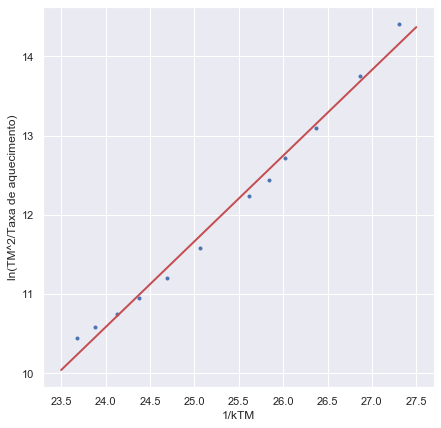

In [221]:
x=np.array([[23.5],[27.5]])
Y =-15.385697360783954 + 1.0819812058118217*x
figurax = plt.Figure(figsize=(7,7));ax=figurax.add_subplot(1,1,1)
ax.plot(AXE['x'],AXE['y'],'b.',label='Dados')
ax.plot(x, Y, "r-", linewidth=2, label="Regressão Linear")
ax.set_ylabel('ln(TM^2/Taxa de aquecimento)')
ax.set_xlabel('1/kTM')
figurax

#### Função de regressão e resposta 

In [239]:
def multi_heating_rate_reg(dados_preparados):#recebe a saída de multi_heating_rate_prep()
    from scipy.stats import linregress
    import math
    k=0.00008617333262145
    x = dados_preparados['x']
    y = dados_preparados['y']
#Regressão Linear

    lin_reg = linregress(x,y) #Regressão
    
#Calculo de parâmetros cinéticos

    ea = lin_reg.slope
    intercept = lin_reg.intercept
    escape_factor = ea*math.exp(intercept/k)
    escape_per_error = (lin_reg.stderr/ea) + lin_reg.intercept_stderr
    escape_error = escape_per_error * escape_factor
    
#Resposta   
    answer_present = {'Energia de Ativação':'{0}  ± {1} eV'.format(ea, lin_reg.stderr),
                      'r^2':lin_reg.rvalue,
                      'Fator de Escape':'{0} ± {1} eV'.format(escape_factor,escape_error),
                      'Erro percentual':'{0} %'.format(escape_per_error*100)}
    answer_db = {'Energia de Ativação':ea,
                 'Incerteza EA':lin_reg.stderr,
                 'r^2':lin_reg.rvalue,
                 'Fator de Escape':escape_factor, 
                 'Incerteza Escape_factor':escape_error,
                 'Percentual Error':escape_per_error} 
    return answer_present, answer_db

In [240]:
multi_heating_rate_reg(AXE)

({'Energia de Ativação': '0.9972257862328963  ± 0.03142350316890752 eV',
  'r^2': 0.9916653942852243,
  'Fator de Escape': '0.0 ± 0.0 eV',
  'Erro percentual': '82.33045804834647 %'},
 {'Energia de Ativação': 0.9972257862328963,
  'Incerteza EA': 0.03142350316890752,
  'r^2': 0.9916653942852243,
  'Fator de Escape': 0.0,
  'Incerteza Escape_factor': 0.0,
  'Percentual Error': 0.8233045804834648})

In [234]:
from scipy.stats import linregress
x = AXE['x']
y = AXE['y']
lin_reg= linregress(x,y)

In [235]:
lin_reg

LinregressResult(slope=0.9972257862328963, intercept=-13.203799731306985, rvalue=0.9916653942852243, pvalue=1.4270676531755026e-16, stderr=0.03142350316890752, intercept_stderr=0.7917936592831493)

### Função de Extração

In [263]:
def extract_mhr(data,samples,heat_rate):#informar uma lista com todas as taxas de aquecimento do DB
    resposta = {'EA_mhr(eV)':[],'error_AREA':[],'r^2_mp':[],'freq_factor_mp':[],
                'ff_percerr_mp':[],'Amostra':[] 
                } #conjunto resposta
    amostra = 1
    for sample in samples:
        
        dados = multi_heating_rate_prep(data,sample,heat_rate)               #função de preparação
        answer_pres, answer = multi_heating_rate_reg(dados)                    #função de regressão
        resposta['EA_mhr(eV)'] += [answer['Energia de Ativação']]#adição da resposta
        resposta['error_AREA'] += [answer['Incerteza EA']]       #adição da resposta
        resposta['r^2_mp'] += [answer['r^2']]               #adição da resposta
        resposta['freq_factor_mp'] += [answer['Fator de Escape']]
        resposta['ff_percerr_mp'] += [answer['Percentual Error']]
        resposta['Amostra'] += ['Amosta {0}'.format(amostra)]                      #adição da resposta
        amostra+=1
    return pd.DataFrame(resposta, index=resposta['Amostra'])
    

In [264]:
extract_mhr(data,samples,heat_samp)

,EA_mhr(eV),error_AREA,r^2_mp,freq_factor_mp,ff_percerr_mp,Amostra
Amosta 1,0.962810,0.032574,0.990410,0.0,0.852330,Amosta 1
Amosta 2,0.872114,0.034412,0.987023,0.0,0.895671,Amosta 2
Amosta 3,0.997226,0.031424,0.991665,0.0,0.823305,Amosta 3
Amosta 4,0.862056,0.035623,0.985794,0.0,0.925300,Amosta 4
Amosta 5,0.874512,0.034044,0.987362,0.0,0.886167,Amosta 5


# Obtenção de resultados

In [6]:
#Separação em amostras
sample1 = ['Curva {0}'.format(i) for i in range(11,201,10)]
sample2 = ['Curva {0}'.format(i) for i in range(12,201,10)]
sample3 = ['Curva {0}'.format(i) for i in range(13,201,10)]
sample4 = ['Curva {0}'.format(i) for i in range(14,201,10)]
sample5 = ['Curva {0}'.format(i) for i in range(15,201,10)]
samples = [sample1,sample2,sample3,sample4,sample5]
# Montagem de das taxas de aquecimento
heat_rate_l = [[i]*5 for i in range(1,11)]
heat_rate_l2 = [0.1]*5 + [0.2]*5 + [0.3]*5 + [0.4]*5 + [0.5]*5 + [0.6]*5 + [0.7]*5 +[0.8]*5 +[0.9]*5
heat_rate=[]
for hr in heat_rate_l:
    heat_rate += hr
heat_rate = heat_rate + heat_rate_l2
heat_rate = sorted(heat_rate, reverse=True)
heat_samp = [10,9,8,7,6,5,4,3,2,1,0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1]

In [7]:
#Leitura de dataset curado
data = pd.read_csv('C:/Users/André Tavares/Desktop/MESTRADO - CDTN/Resultados finais/Resultados finais.csv')
data.pop('index')

0        0
1        1
2        2
3        3
4        4
      ... 
345    345
346    346
347    347
348    348
349    349
Name: index, Length: 350, dtype: int64

Aumento da temperatura de forma que a função de aqucimento seja T=25+Beta*segundos

In [8]:
data['Temperatura'] +=25
data.set_index('Temperatura')

,Curva 11,Curva 12,Curva 13,Curva 14,Curva 15,Curva 21,Curva 22,Curva 23,Curva 24,Curva 25,...,Curva 181,Curva 182,Curva 183,Curva 184,Curva 185,Curva 191,Curva 192,Curva 193,Curva 194,Curva 195
Temperatura,,,,,,,,,,,,,,,,,,,,,
25,11.0,15.0,11.0,14.0,11.0,13.0,16.0,18.0,4.0,9.0,...,282.0,188.0,140.0,128.0,136.0,421.0,259.0,313.0,294.0,293.0
26,13.0,14.0,14.0,8.0,12.0,9.0,14.0,13.0,11.0,12.0,...,289.0,157.0,171.0,150.0,158.0,505.0,344.0,262.0,301.0,261.0
27,14.0,10.0,12.0,10.0,7.0,11.0,16.0,7.0,12.0,13.0,...,328.0,141.0,176.0,144.0,157.0,554.0,306.0,284.0,272.0,299.0
28,18.0,15.0,6.0,5.0,6.0,8.0,17.0,16.0,16.0,16.0,...,358.0,176.0,137.0,146.0,148.0,579.0,293.0,329.0,314.0,281.0
29,11.0,17.0,15.0,12.0,8.0,18.0,16.0,14.0,15.0,6.0,...,353.0,174.0,165.0,168.0,156.0,541.0,311.0,309.0,304.0,309.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370,11157.0,9871.0,10956.0,8880.0,8707.0,11744.0,10247.0,11812.0,8791.0,8991.0,...,73785.0,73031.0,79630.0,71313.0,79077.0,121589.0,111070.0,127350.0,116406.0,140719.0
371,11527.0,10107.0,11583.0,8996.0,8998.0,12074.0,10467.0,12076.0,9073.0,9324.0,...,75738.0,74485.0,82676.0,74327.0,81765.0,125854.0,116233.0,130664.0,121537.0,147228.0
372,11885.0,10457.0,11626.0,9121.0,9235.0,12487.0,10851.0,12291.0,9084.0,9352.0,...,78602.0,75957.0,84129.0,75029.0,85115.0,130970.0,120966.0,136660.0,126305.0,152400.0


Extração de resultados

In [34]:
area_data = extract_area(data,heat_rate,test_kin_order=[1.1,1.2,1.3,1.4])

In [35]:
area_data.tail(5)

,EA_AREA(eV),error_AREA,r^2_AREA,freq_factor_AREA,ff_err_AREA,ff_percerr_AREA,AREA_kin_order,objeto,Taxa de aquecimento
Curva 191,1.110012,0.009500,-0.997156,1.538973e-13,4.345107e-14,0.282338,b = 1,Curva 191,0.1
Curva 192,1.135480,0.006326,-0.998792,8.452617e-14,1.589118e-14,0.188003,b = 1,Curva 192,0.1
Curva 193,1.108552,0.009851,-0.996934,1.582893e-13,4.634467e-14,0.292785,b = 1,Curva 193,0.1
Curva 194,1.138565,0.006069,-0.998894,8.431049e-14,1.520686e-14,0.180367,b = 1,Curva 194,0.1
Curva 195,1.129802,0.006906,-0.998546,9.820982e-14,2.015805e-14,0.205255,b = 1,Curva 195,0.1


In [36]:
area_data.head(5)

,EA_AREA(eV),error_AREA,r^2_AREA,freq_factor_AREA,ff_err_AREA,ff_percerr_AREA,AREA_kin_order,objeto,Taxa de aquecimento
Curva 11,1.304175,0.007346,-0.998370,3.186337e-13,5.943526e-14,0.186532,b = 1,Curva 11,10.0
Curva 12,1.299657,0.017293,-0.991005,6.619226e-13,2.906650e-13,0.439122,b = 1,Curva 12,10.0
Curva 13,1.279431,0.004801,-0.999276,4.521669e-13,5.512871e-14,0.121921,b = 1,Curva 13,10.0
Curva 14,1.324304,0.016720,-0.991890,4.024433e-13,1.708703e-13,0.424582,b = 1,Curva 14,10.0
Curva 15,1.328949,0.015447,-0.993114,3.151606e-13,1.236216e-13,0.392250,b = 1,Curva 15,10.0


In [164]:
# Onde salvar as figuras
PROJECT_ROOT_DIR = r'C:\Users\André Tavares\Desktop'
CHAPTER_ID = "training_linear_models"
import os
def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)


In [55]:
import seaborn as sns

c:\users\andré tavares\appdata\local\programs\python\python38\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


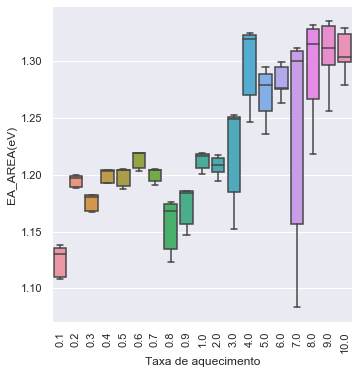

In [158]:
sing = sns.factorplot(x='Taxa de aquecimento',y='EA_AREA(eV)', kind='box', data=area_data)
plt.xticks(rotation=90)
sing.savefig('C:/Users/André Tavares/Desktop/MESTRADO - CDTN/Resultados finais/area_dist.png')

In [277]:
ir_data = extract_ir(data)
ir_data

,EA_IR(eV),error_ir,r^2_ir,objeto
Curva 11,1.354316,0.004597,-0.999931,Curva 11
Curva 12,1.381203,0.005695,-0.999898,Curva 12
Curva 13,1.325906,0.002665,-0.999976,Curva 13
Curva 14,1.377879,0.003187,-0.999968,Curva 14
Curva 15,1.385198,0.004730,-0.999930,Curva 15
...,...,...,...,...
Curva 191,1.160031,0.002200,-0.999978,Curva 191
Curva 192,1.152998,0.002400,-0.999974,Curva 192
Curva 193,1.166565,0.003286,-0.999952,Curva 193
Curva 194,1.154678,0.001905,-0.999984,Curva 194


Criação de um dataset auxiliar

In [52]:
shape_data = extract_pshape(data)
shape_data['hr'] = heat_rate
ir_data = extract_ir(data)
area_data = extract_area(data,heat_rate,test_kin_order=[1.1,1.2,1.3,1.4])

aux = {'Método':[],'EA(eV)':[]}
aux['hr'] = heat_rate*5
aux['Método']+=['Omega']*95
aux['Método']+=['Tau']*95
aux['Método']+=['Delta']*95
aux['Método']+=['Area']*95
aux['Método']+=['IR']*95
x= list(shape_data['omega_chen(eV)'])
y= list(shape_data['tau_chen(eV)'])
z=list(shape_data['delta_chen(eV)'])
w=list(area_data['EA_AREA(eV)'])
s=list(ir_data['EA_IR(eV)'])
aux['EA(eV)']+= x
aux['EA(eV)']+= y
aux['EA(eV)']+= z
aux['EA(eV)']+= w
aux['EA(eV)']+= s
aux = pd.DataFrame(aux)

In [273]:
contagem = shape_data['ordem_cinetica'].value_counts()

Saving figure Relação Cinética


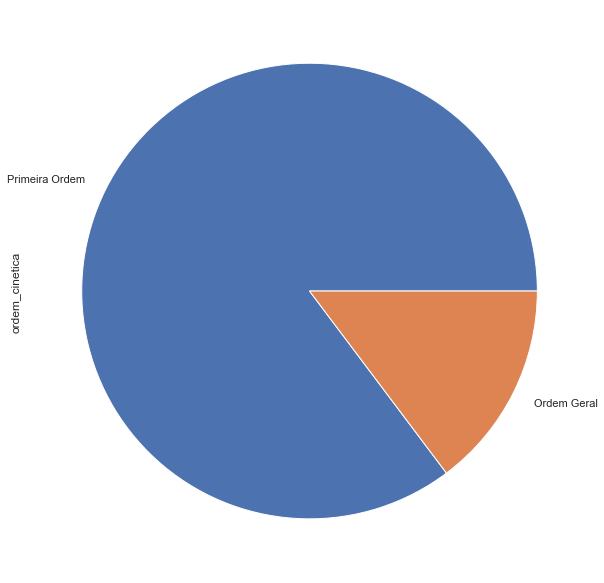

In [275]:
contagem.plot(kind='pie')
save_fig('Relação Cinética')

Distribuição dos valores de Energia de ativação

c:\users\andré tavares\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Saving figure Distribuição de Resposta


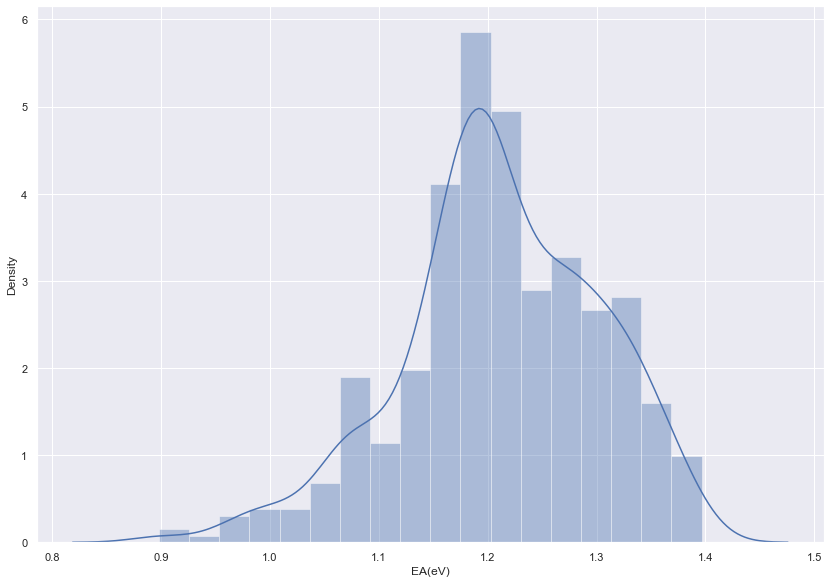

In [165]:
sns.distplot(aux["EA(eV)"])
save_fig('Distribuição de Resposta')

Distribuição das energia de ativação por método

c:\users\andré tavares\appdata\local\programs\python\python38\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


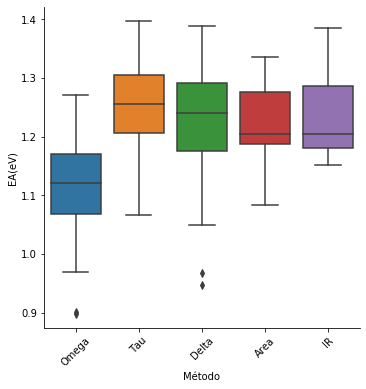

In [53]:
Summary = sns.factorplot(y='EA(eV)',x='Método', kind='box', data=aux)
plt.xticks(rotation=45)
Summary.savefig('C:/Users/André Tavares/Desktop/MESTRADO - CDTN/Resultados finais/met_dist.png')

Distribuição da temperatura de pico por taxa de aquecimento

c:\users\andré tavares\appdata\local\programs\python\python38\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


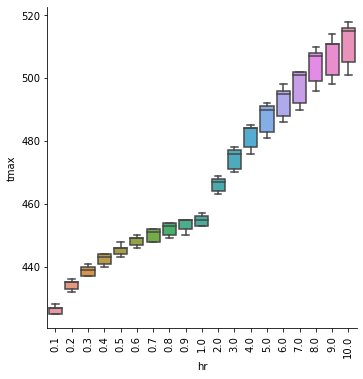

In [50]:
Summary = sns.factorplot(y='tmax',x='hr', kind='box', data=shape_data)
plt.xticks(rotation=90)
Summary.savefig('C:/Users/André Tavares/Desktop/MESTRADO - CDTN/Resultados finais/temp_dist.png')

In [201]:
ir_data.to_csv('C:/Users/André Tavares/Desktop/MESTRADO - CDTN/Resultados finais/Metodo de ascenção inicial.csv')

Distribuição dos valores de energia de ativação por taxa de aquecimento sem rotular os métodos

c:\users\andré tavares\appdata\local\programs\python\python38\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


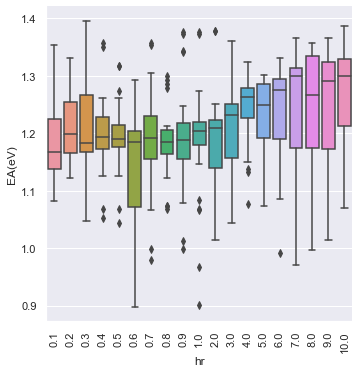

In [145]:
Summary = sns.factorplot(y='EA(eV)',x='hr', kind='box', data=aux)
plt.xticks(rotation=90)
Summary.savefig('C:/Users/André Tavares/Desktop/MESTRADO - CDTN/Resultados finais/all_met(hr).png')

Distribuição do fator de forma em todas as curvas por taxa de aquecimento

c:\users\andré tavares\appdata\local\programs\python\python38\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 <a list of 19 Text xticklabel objects>)

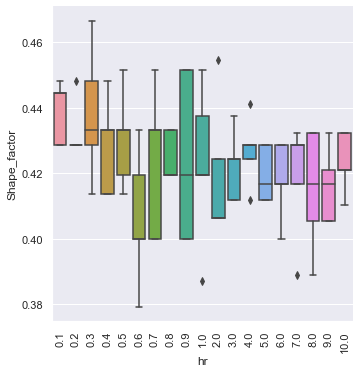

In [90]:
sns.factorplot(y='Shape_factor',x='hr', kind='box', data=shape_data)
plt.xticks(rotation=90)

In [49]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 11.7,8.,0

ValueError: Key figure.figsize: You must supply exactly 2 values, you provided 3 values: (11.7, 8.0, 0)

In [151]:
shape_data['Fator de Forma']=['Fator de Forma']*95

c:\users\andré tavares\appdata\local\programs\python\python38\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


Saving figure Fator de forma


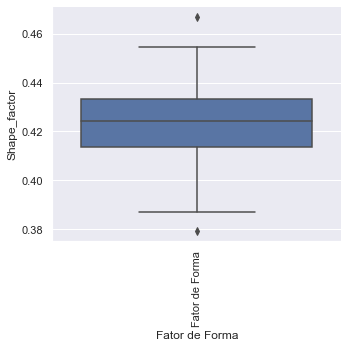

In [166]:
liga = sns.factorplot(y='Shape_factor',x='Fator de Forma', kind='box', data=shape_data)
plt.xticks(rotation=90)
save_fig('Fator de forma')

### Modelos E(beta)

In [91]:
#valores médios agrupados pela taxa de aquecimento
grouped = shape_data.groupby('hr').mean()
grouped2 = area_data.groupby('Taxa de aquecimento').mean()
grouped3 = ir_data.groupby('hr').mean()
ir_data['hr']=heat_rate

In [168]:
#desvio padrão
groupeds = shape_data.groupby('hr').std()
groupeds2 = area_data.groupby('Taxa de aquecimento').std()
groupeds3 = ir_data.groupby('hr').std()

In [189]:
#dataset de incertezas
import math
incertezaEstEA = pd.DataFrame({'tau':groupeds['tau_chen(eV)']/math.sqrt(5),'omega':groupeds['omega_chen(eV)']/math.sqrt(5),
                               'delta':groupeds['delta_chen(eV)']/math.sqrt(5),'AREA':groupeds2['EA_AREA(eV)']/math.sqrt(5),
                              'IR':groupeds3['EA_IR(eV)']/math.sqrt(5)})

In [196]:
grouped3.to_csv('C:/Users/André Tavares/Desktop/MESTRADO - CDTN/Resultados finais/Metodo de initial rise (group mean).csv')

Comportamento da Energia de ativação obtida em diferentes métodos em função da taxa de aquecimento

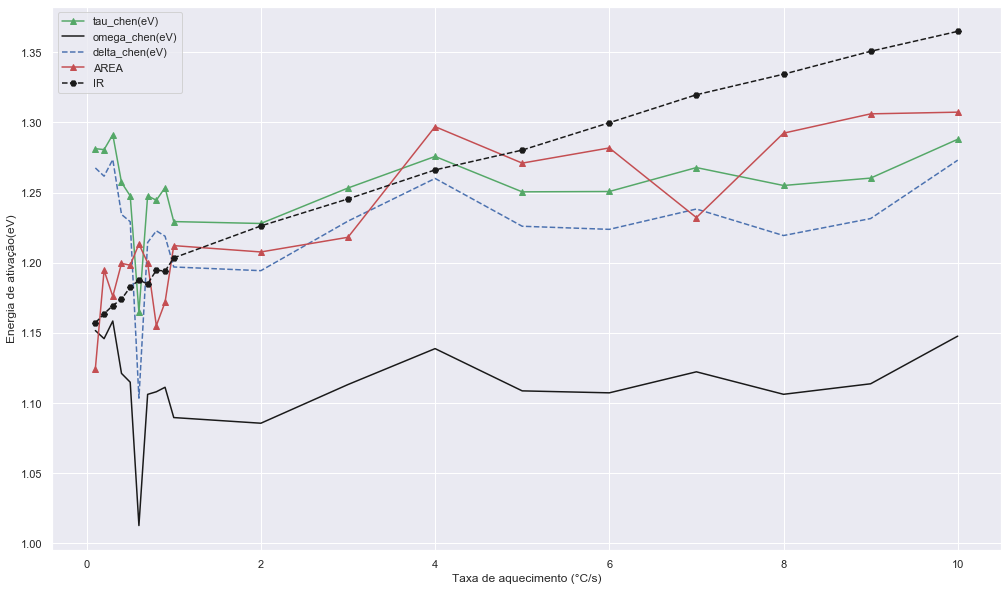

In [150]:
import matplotlib.pyplot as plt
i = ['tau_chen(eV)','omega_chen(eV)','delta_chen(eV)']
cor = ['^g-','k-','b--']
Fig1=plt.Figure(figsize=(17,10)); ax = Fig1.add_subplot(1,1,1)
for isa,color in zip(i,cor):
    ax.plot(grouped.index, grouped[isa], color, label= isa)
ax.plot(grouped.index, grouped2['EA_AREA(eV)'], '^r-', label= 'AREA')
ax.plot(grouped.index, grouped3['EA_IR(eV)'], 'Hk--', label= 'IR')
ax.legend(loc='best')
ax.set_ylabel('Energia de ativação(eV)')
ax.set_xlabel('Taxa de aquecimento (°C/s)')
Fig1.savefig('C:/Users/André Tavares/Desktop/MESTRADO - CDTN/Resultados finais/E(beta).png')
Fig1


In [147]:
#Diminuição do intervalo de observação
grupo1 = grouped[:][:1]
grupo2 = grouped2[:][:1]
grupo3 = grouped3[:][:1]

,EA_IR(eV),error_ir,r^2_ir
hr,,,
0.1,1.157100,0.002748,-0.999964
0.2,1.163564,0.003316,-0.999948
0.3,1.169430,0.002461,-0.999972
0.4,1.173974,0.003120,-0.999956
0.5,1.182537,0.002772,-0.999966
0.6,1.187568,0.002455,-0.999973
0.7,1.184901,0.002909,-0.999964
0.8,1.194662,0.002208,-0.999978
0.9,1.194032,0.002946,-0.999962


Zoom para a área que contém os valores mínimos observados

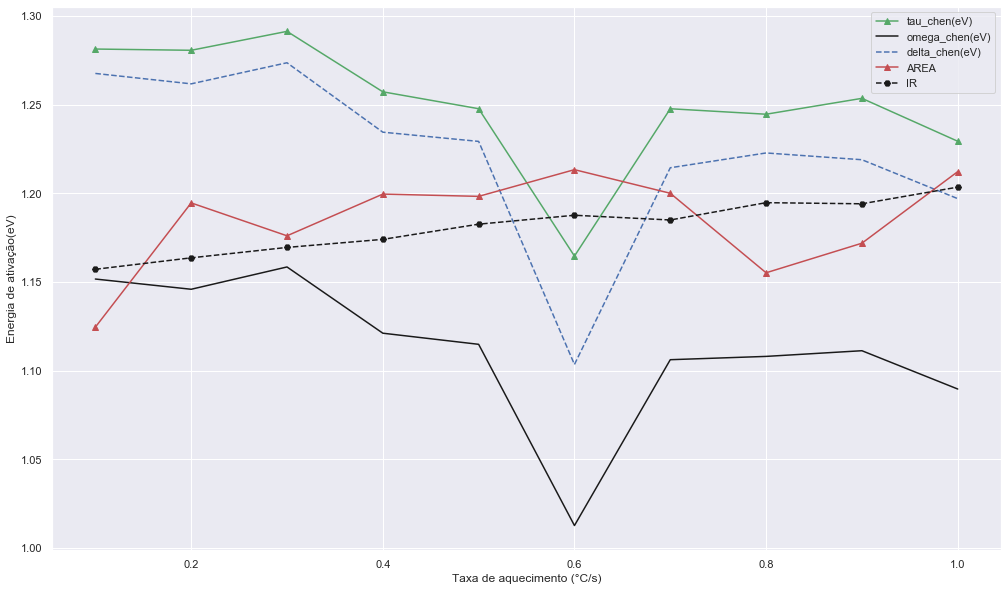

In [149]:
import matplotlib.pyplot as plt
i = ['tau_chen(eV)','omega_chen(eV)','delta_chen(eV)']
cor = ['^g-','k-','b--']
Fig1=plt.Figure(figsize=(17,10)); ax = Fig1.add_subplot(1,1,1)
for isa,color in zip(i,cor):
    ax.plot(grupo1.index, grupo1[isa], color, label= isa)
ax.plot(grupo1.index, grupo2['EA_AREA(eV)'], '^r-', label= 'AREA')
ax.plot(grupo1.index, grupo3['EA_IR(eV)'], 'Hk--', label= 'IR')
ax.legend(loc='best')
ax.set_ylabel('Energia de ativação(eV)')
ax.set_xlabel('Taxa de aquecimento (°C/s)')
Fig1.savefig('C:/Users/André Tavares/Desktop/MESTRADO - CDTN/Resultados finais/E(beta0.1-1).png')
Fig1

Plot SNS com valores de incerteza em sombreado

Saving figure Plot com incerteza


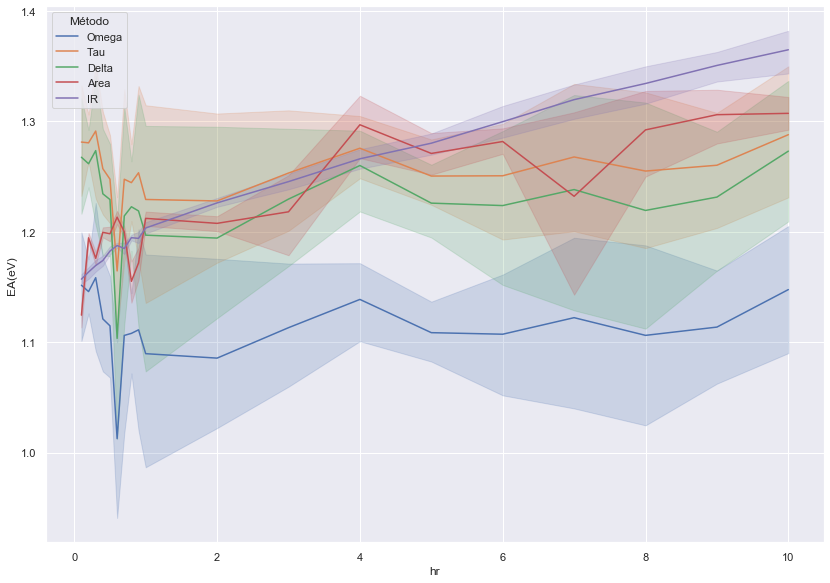

In [167]:
sns.lineplot(x='hr',y='EA(eV)',hue='Método',data=aux)
save_fig('Plot com incerteza')

# Fatores de forma e temperatura por beta max por amostras 

In [57]:
amostras = ['Amostra 1','Amostra 2','Amostra 3', 'Amostra 4', 'Amostra 5']*19
shape_data = extract_pshape(data)
shape_data['Amostra'] = amostras
shape_data['hr'] = heat_rate
shape_data[['tmax','t1','t2']]+=25
shape_data['omega'] = shape_data['t2']-shape_data['t1']
shape_data['tau'] = shape_data['tmax']-shape_data['t1']
shape_data['delta'] = shape_data['t2']-shape_data['tmax']

In [84]:
grupos_less_one = shape_data[['omega','tau','delta','tmax','hr','Amostra','tau_chen(eV)','omega_chen(eV)','delta_chen(eV)']]
grupos_less_one = grupos_less_one[:][grupos_less_one.hr<1]
grupo = shape_data.groupby(['Amostra','hr']).mean()

grupos = grupo[['omega','tau','delta','tmax','tau_chen(eV)','omega_chen(eV)','delta_chen(eV)']]
grupo

tau_chen(eV)  omega_chen(eV)  delta_chen(eV)  delta_error  \
Amostra   hr                                                                
Amostra 1 0.1       1.339371        1.207363        1.326431     0.058584   
          0.2       1.263208        1.127177        1.241505     0.054772   
          0.3       1.337388        1.209352        1.330434     0.054400   
          0.4       1.196863        1.052776        1.156600     0.050972   
          0.5       1.214997        1.068536        1.173342     0.051690   
...                      ...             ...             ...          ...   
Amostra 5 6.0       1.330768        1.190270        1.317995     0.046737   
          7.0       1.366655        1.221901        1.351861     0.047902   
          8.0       1.173883        0.996005        1.075366     0.040632   
          9.0       1.322674        1.169129        1.291335     0.045702   
          10.0      1.386632        1.244651        1.379464     0.045923   

                tmax   t1   t2         IM  Shape_factor  Sf_error  omega  tau  \
Amostra   hr                                                                    
Amostra 1 0.1    425  410  437  1721279.0      0.444444  0.026749     27   15   
          0.2    433  417  445  1683515.0      0.428571  0.025510     28   16   
          0.3    437  421  450  1672817.0      0.448276  0.024970     29   16   
          0.4    441  424  453  1679136.0      0.413793  0.024376     29   17   
          0.5    444  427  456  1683676.0      0.413793  0.024376     29   17   
...              ...  ...  ...        ...           ...       ...    ...  ...   
Amostra 5 6.0    495  475  510  1260812.0      0.428571  0.020408     35   20   
          7.0    501  481  516  1253451.0      0.428571  0.020408     35   20   
          8.0    508  486  522  1237784.0      0.388889  0.019290     36   22   
          9.0    511  490  526  1240251.0      0.416667  0.019676     36   21   
          10.0   515  494  531  1237053.0      0.432432  0.019357     37   21   

                delta  
Amostra   hr           
Amostra 1 0.1      12  
          0.2      12  
          0.3      13  
          0.4      12  
          0.5      12  
...               ...  
Amostra 5 6.0      15  
          7.0      15  
          8.0      14  
          9.0      15  
          10.0     16  

[95 rows x 13 columns]

In [85]:
grupo.to_csv('C:/Users/André Tavares/Desktop/MESTRADO - CDTN/Resultados finais/Método de forma agrupado por amostra e por hr.csv')

In [54]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

### Dados Taxa de aquecimento > 1


Os dados estão dispostos como Temperatura máxima, tau, omega e delta por amostras para intervalos maiores e menores que 1

#### Temperatura máxima e Parâmetros de forma

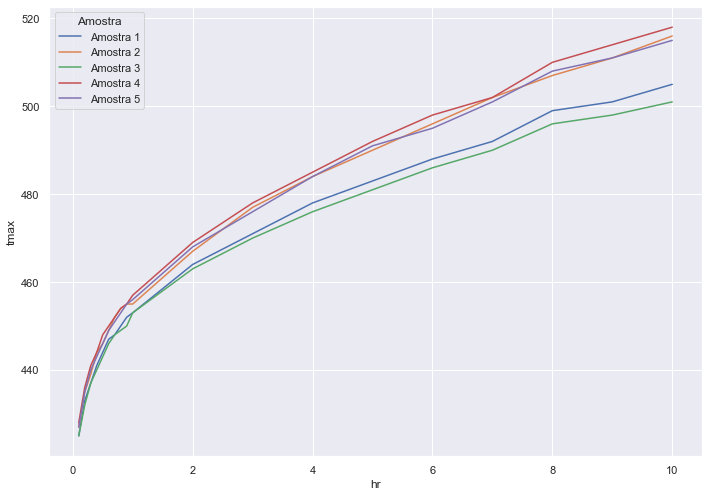

In [58]:
img = sns.lineplot(x='hr',y='tmax',hue='Amostra',data=shape_data)

Distribuição de temperaturas máximas por amostras

c:\users\andré tavares\appdata\local\programs\python\python38\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


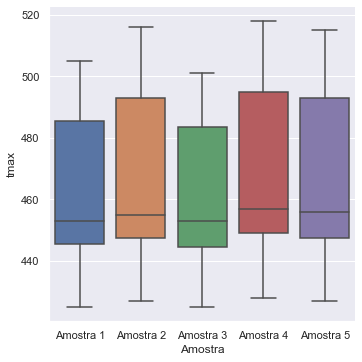

In [89]:
sns.factorplot(y='tmax',x='Amostra', kind='box', data=shape_data)

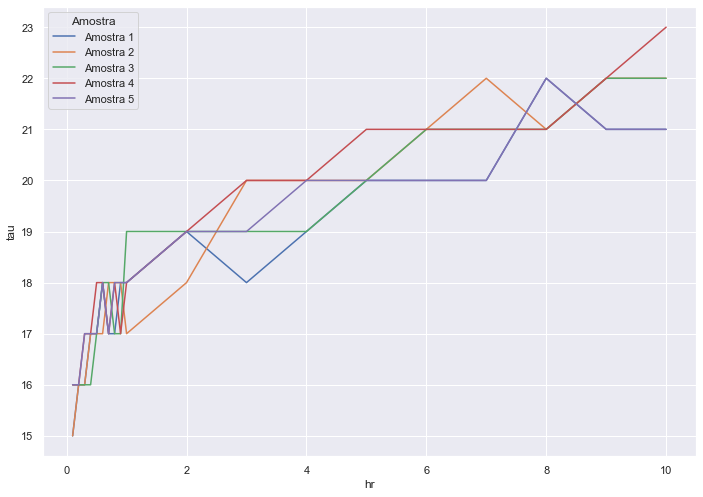

In [60]:
img = sns.lineplot(x='hr',y='tau',hue='Amostra',data=shape_data)

c:\users\andré tavares\appdata\local\programs\python\python38\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


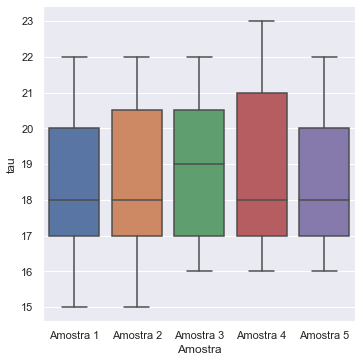

In [80]:
sns.factorplot(y='tau',x='Amostra', kind='box', data=shape_data)

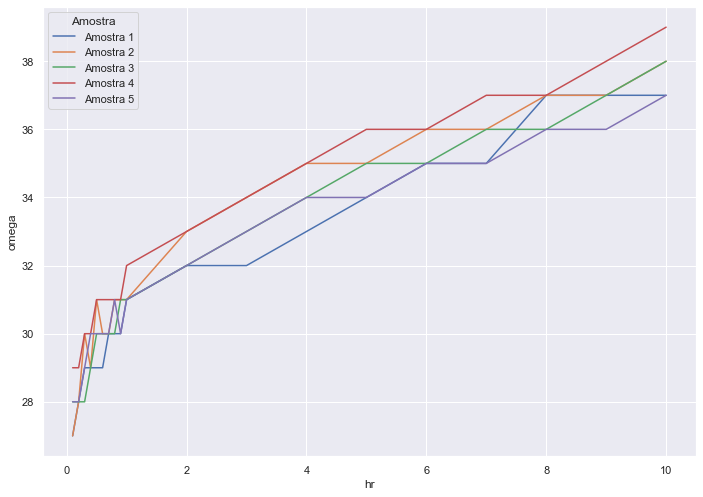

In [70]:
img = sns.lineplot(x='hr',y='omega',hue='Amostra',data=shape_data)

Distribuição do fator de forma omega por amostra

c:\users\andré tavares\appdata\local\programs\python\python38\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


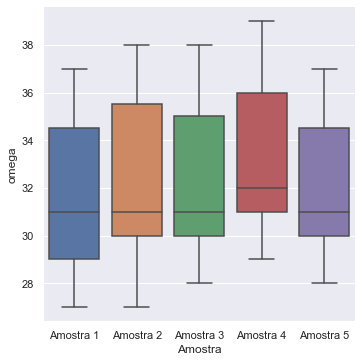

In [79]:
sns.factorplot(y='omega',x='Amostra', kind='box', data=shape_data)

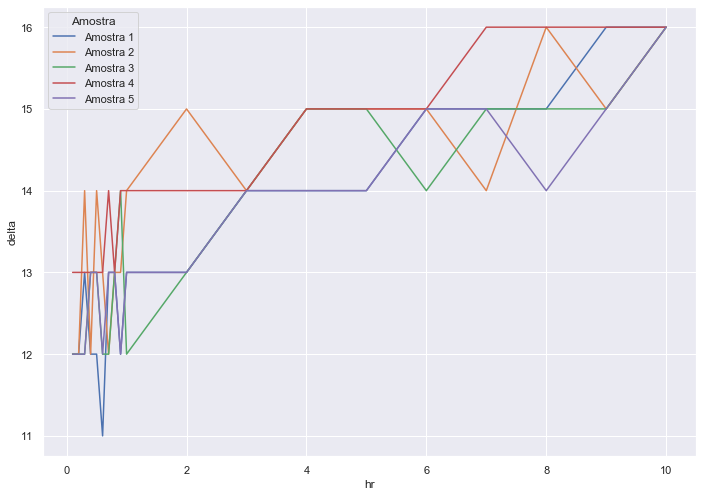

In [71]:
img = sns.lineplot(x='hr',y='delta',hue='Amostra',data=shape_data)

c:\users\andré tavares\appdata\local\programs\python\python38\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


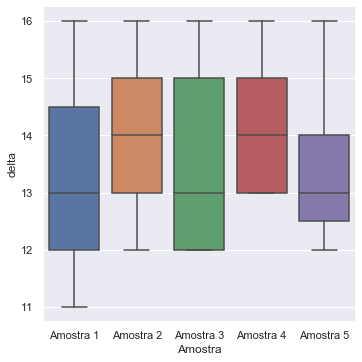

In [81]:
sns.factorplot(y='delta',x='Amostra', kind='box', data=shape_data)

#### Energia de Ativação

Claramente observa-se que as curvas de todos os métodos são iguais entretantos a unica coisa que muda é o intervalo da amplitude dos valores do eixo y.

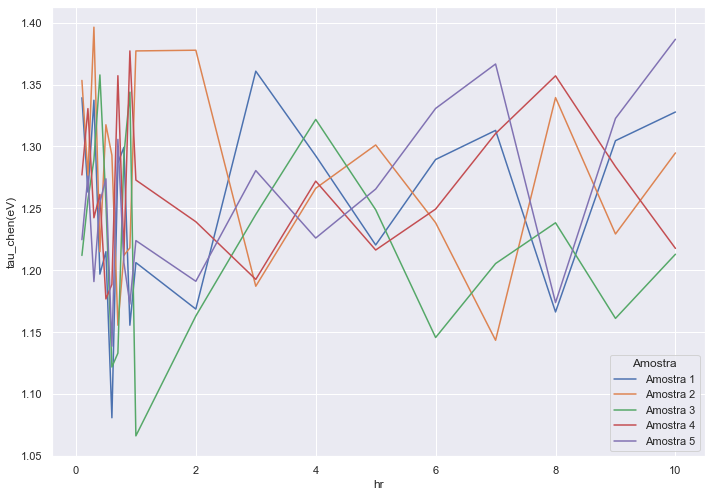

In [64]:
img = sns.lineplot(x='hr',y='tau_chen(eV)',hue='Amostra',data=shape_data)

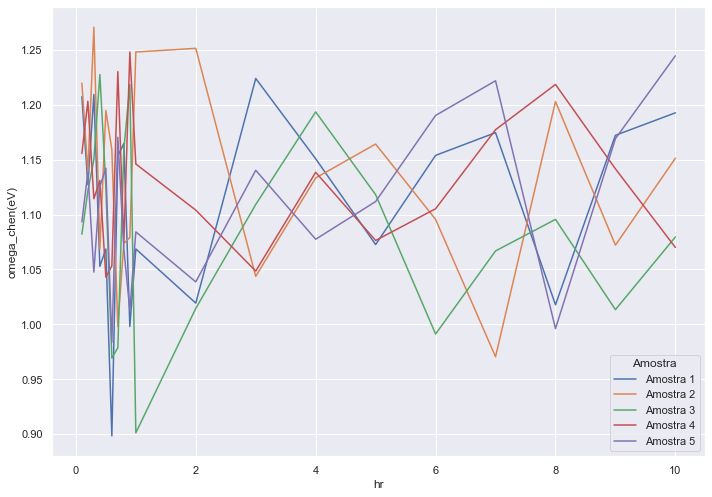

In [72]:
img = sns.lineplot(x='hr',y='omega_chen(eV)',hue='Amostra',data=shape_data)

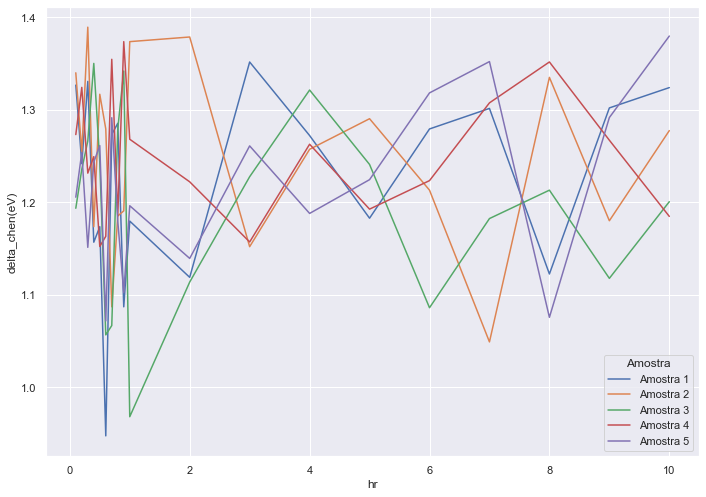

In [73]:
img = sns.lineplot(x='hr',y='delta_chen(eV)',hue='Amostra',data=shape_data)

# M

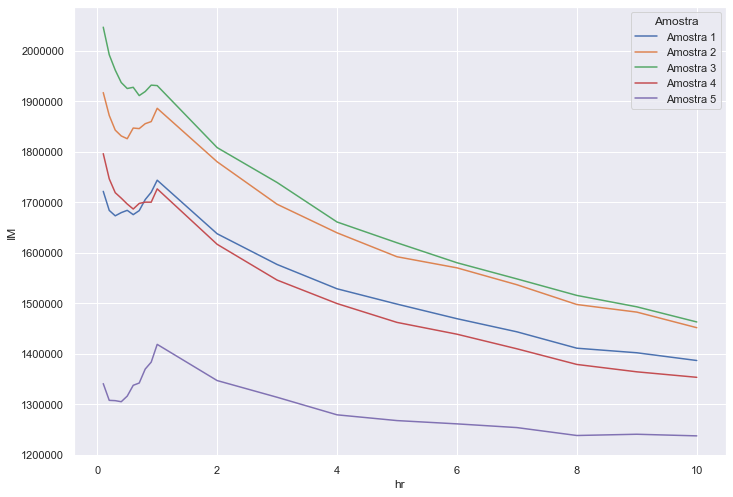

In [90]:
img = sns.lineplot(x='hr',y='IM',hue='Amostra',data=shape_data)

### Dados Taxa de aqucimento < 1 (ZOOM)

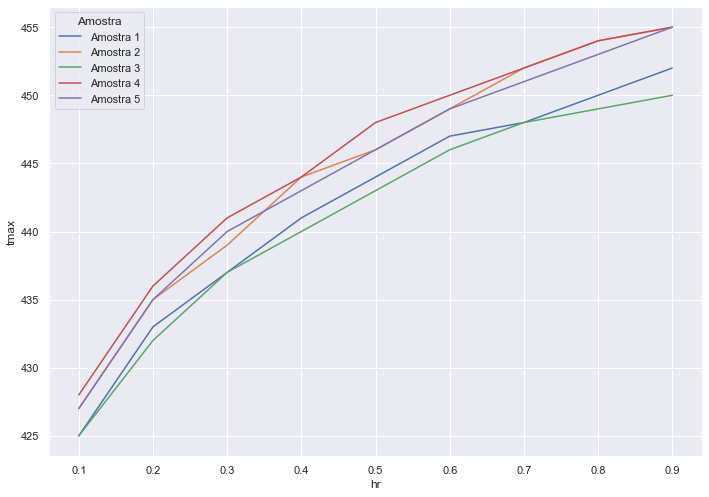

In [55]:
import seaborn as sns
img = sns.lineplot(x='hr',y='tmax',hue='Amostra',data=grupos_less_one)
img
#save_fig('Plot com incerteza


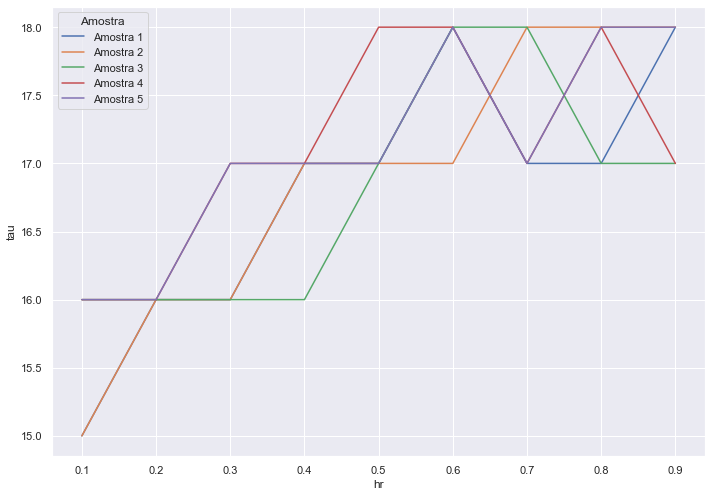

In [76]:
img = sns.lineplot(x='hr',y='tau',hue='Amostra',data=grupos_less_one)

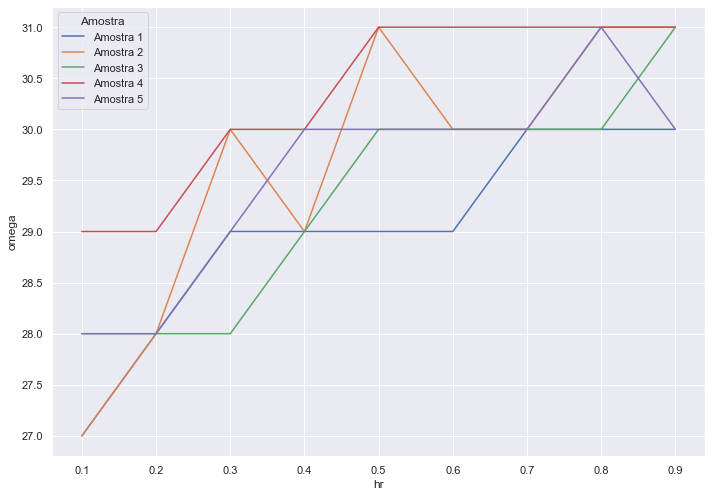

In [77]:
img = sns.lineplot(x='hr',y='omega',hue='Amostra',data=grupos_less_one)

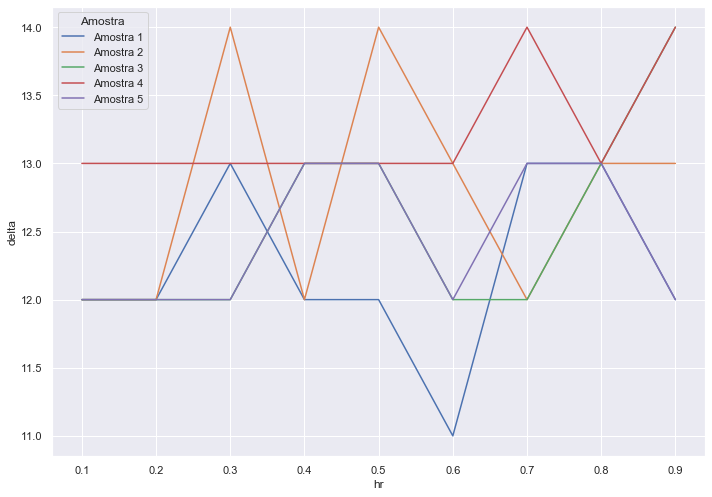

In [78]:
img = sns.lineplot(x='hr',y='delta',hue='Amostra',data=grupos_less_one)

#### Energia de Ativação

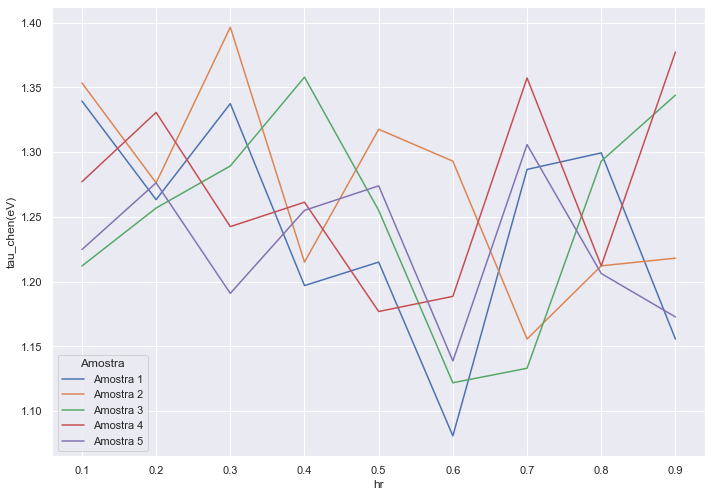

In [69]:
img = sns.lineplot(x='hr',y='tau_chen(eV)',hue='Amostra',data=grupos_less_one)

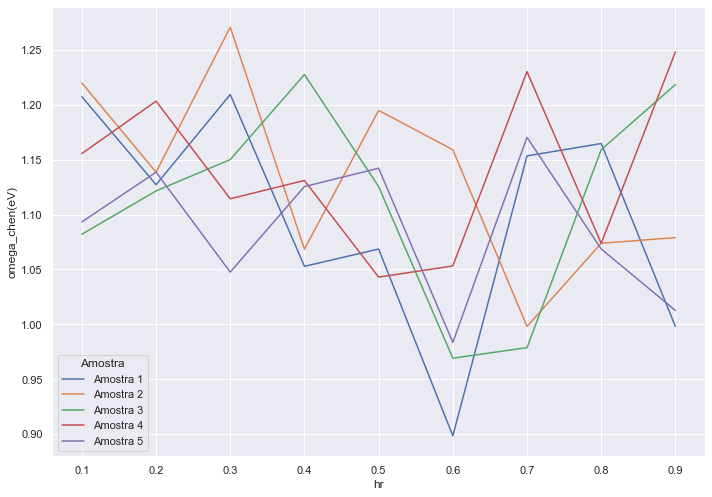

In [75]:
img = sns.lineplot(x='hr',y='omega_chen(eV)',hue='Amostra',data=grupos_less_one)

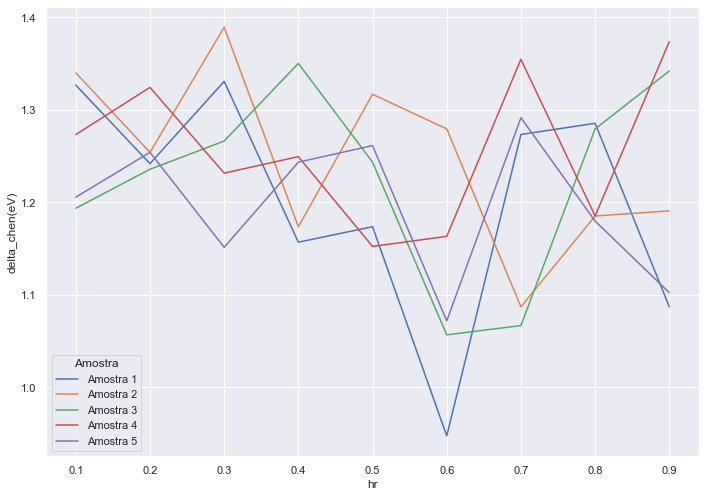

In [74]:
img = sns.lineplot(x='hr',y='delta_chen(eV)',hue='Amostra',data=grupos_less_one)

###  Fator de Frequencia

In [15]:
aux2 = {'Método':[],'ff':[]}
aux2['Método']+=['Area']*95
x= list(area_data['freq_factor_AREA'])
aux2['ff']+= x
len(aux2['Método'])
aux2=pd.DataFrame(aux2)

In [267]:
#separar por quartil

In [28]:
from scipy import stats
z = np.abs(stats.zscore(aux2['ff']))
data_clean = aux2[z<1]

c:\users\andré tavares\appdata\local\programs\python\python38\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


NameError: name 'set_ylim' is not defined

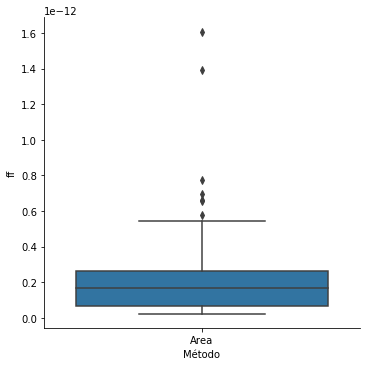

In [31]:
sumsns.factorplot(y='ff',x='Método', kind='box', data=data_clean)
set_ylim([10e-14, 10e-12])